# Creación del dataset dsualm

Antes de nada necesitamos cargar las librerías pandas, matplotlib,networkx y el paquete nilmtk.

Asimismo realizaremos algunos otros ajustes.

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib import rcParams
from nilmtk.utils import print_dict
from nilmtk import DataSet
import warnings
warnings. filterwarnings("ignore")
plt.style.use('bmh')

## Creación del fichero en formato  HDFS5 a partir de las medidas y los metadatos 

La primera tarea es la conversion de los diferentes ficheros de medidas en formato csv al formato HDFS5  (o simplificando H5), que almacenaramos en la carpeta `./data`. Además en el archivo h5, que va contener los datos recopilados,  tambien tendremos todos  los metadatos del dataset.

El timestamp arrojado por el oZM esta en  en formato 13 digitos (es decir almacena hasta los milisegundos pasados desde el 1 del 1 de 1970).El Timestamp en "timezone" para Almeria es "Europe/Madrid" https://www.epochconverter.com/

El resto de metadatos tienen que ver con la potencia (real,reactiva y aparente), el voltaje, la intensidad,la frecuencia y el factor de potencia.

Para cada fichero csv, que numeraremos del 1 al 11 corresponditntes a cada medidor (siendo el nº 1 el principal),en la clase convert_ualm,  seguimos los siguintes pasos:

- Lectura del fichero numeado

- Conversión a formato fecha del campo timestamp

- Carga del resto de columnas

- Sort index

- Resample

- Reindexacion del fichero

Obviamente la clase  lanza este proceso para todos los ficheros de datos localizados en la carpeta de entrada \electricity\  usando  el fichero labels.csv

El contenido del fichero labels.csv es el siguinte:

- 1 mains

- 2 electric furnace

- 3 microwave

- 4 television

- 5 kettle

- 6 vacuum_cleaner

- 7 electric space heater

- 8 alectric shower heater

- 9 fan

- 10 fridge

- 11 freezer


Por ultimo, asociamos los metadatos correspondientes ,leyendo los ficheros de la ruta C:\Users\XXXXX\anaconda3\envs\nilmtk-env\Lib\site-packages\nilmtk\dataset_converters\ualm\metadata. 


Los ficheros que usaremos como metadatos para incorporarlos al fichero H5 son los siguintes:

 - builiding1.yaml
 
 - dataset.yaml
 
 - meter_devices.yaml



In [2]:
from nilmtk.dataset_converters import convert_ualm
convert_ualm('./data/ozm1/', 'dsual.h5','2022-11-23','2022-11-23')


Path ualm: ./data/ozm1/ /electricity

***********************************************************************************************
..Loading file    1 .csv
..Reading file csv
          timestamp        W      VAR         VA        f      VLN        PF  \
0      1.669193e+12  18.1469 -7.76522  19.738554  50.0263  244.177  0.478618   
1      1.669193e+12  18.0288 -7.80309  19.644962  50.0265  244.154  0.496399   
2      1.669193e+12  17.4511 -7.68828  19.069609  50.0267  244.158  0.481039   
3      1.669193e+12  17.4225 -6.97172  18.765649  50.0265  244.174  0.488091   
4      1.669193e+12  17.8724 -7.14586  19.247978  50.0267  244.230  0.499596   
...             ...      ...      ...        ...      ...      ...       ...   
36663  1.669200e+12  17.3243 -6.63078  18.549885  50.0244  243.858  0.515264   
36664  1.669200e+12  17.2373 -6.33809  18.365611  50.0242  243.783  0.531090   
36665  1.669200e+12  17.1743 -7.26460  18.647584  50.0242  243.784  0.521941   
36666  1.669200e+12  1

..Reading file csv
          timestamp        W      VAR        VA        f      VLN        PF  \
0      1.669193e+12  6.95467 -1.30684  7.076386  50.0484  245.475  0.775992   
1      1.669193e+12  7.06172 -2.07703  7.360840  50.0484  245.468  0.783664   
2      1.669193e+12  7.20207 -1.98814  7.471446  50.0482  245.460  0.751210   
3      1.669193e+12  7.54665 -1.63597  7.721938  50.0484  245.565  0.770578   
4      1.669193e+12  7.59132 -1.70459  7.780344  50.0486  245.475  0.787493   
...             ...      ...      ...       ...      ...      ...       ...   
36662  1.669200e+12  6.38994 -1.22404  6.506119  50.0377  245.167  0.747044   
36663  1.669200e+12  6.92924 -1.42049  7.073346  50.0377  245.088  0.816216   
36664  1.669200e+12  7.24096 -1.41069  7.377094  50.0379  245.058  0.841914   
36665  1.669200e+12  6.96076 -1.91653  7.219780  50.0382  245.103  0.776506   
36666  1.669200e+12  6.89090 -1.28539  7.009759  50.0382  245.065  0.811903   

              A  
0      0.03651

..Reading file csv
          timestamp        W      VAR        VA        f      VLN        PF  \
0      1.669193e+12  5.66658 -2.32157  6.123708  50.0484  245.475  0.659994   
1      1.669193e+12  4.93710 -2.43828  5.506378  50.0484  245.468  0.627613   
2      1.669193e+12  5.40088 -1.93958  5.738590  50.0482  245.460  0.485863   
3      1.669193e+12  6.02163 -1.99822  6.344523  50.0484  245.565  0.691281   
4      1.669193e+12  6.30762 -2.53335  6.797353  50.0486  245.475  0.700240   
...             ...      ...      ...       ...      ...      ...       ...   
36661  1.669200e+12  4.83813 -1.86680  5.185796  50.0377  245.167  0.478132   
36662  1.669200e+12  4.74218 -1.89230  5.105786  50.0377  245.088  0.624250   
36663  1.669200e+12  5.30949 -1.58756  5.541752  50.0379  245.058  0.752917   
36664  1.669200e+12  5.19370 -2.11856  5.609175  50.0382  245.103  0.602230   
36665  1.669200e+12  4.95553 -1.74952  5.255297  50.0382  245.065  0.652935   

              A  
0      0.03497

Conversion of timestamp
                                        W      VAR        VA        f  \
2022-11-23 09:42:37.532000+01:00  3.27461 -2.80502  4.311753  50.0263   
2022-11-23 09:42:37.732000+01:00  3.42282 -2.96072  4.525654  50.0265   
2022-11-23 09:42:37.932000+01:00  3.23573 -2.69186  4.209040  50.0267   
2022-11-23 09:42:38.132000+01:00  3.24093 -3.12198  4.500039  50.0265   
2022-11-23 09:42:38.332000+01:00  3.61389 -3.17577  4.810999  50.0267   
...                                   ...      ...       ...      ...   
2022-11-23 11:44:48.092000+01:00  2.19842 -3.35737  4.013103  50.0244   
2022-11-23 11:44:48.292000+01:00  2.56979 -3.60987  4.431137  50.0242   
2022-11-23 11:44:48.492000+01:00  3.57967 -3.31417  4.878293  50.0242   
2022-11-23 11:44:48.692000+01:00  2.80670 -2.91867  4.049224  50.0242   
2022-11-23 11:44:48.891000+01:00  2.44390 -2.77699  3.699235  50.0242   

                                      VLN        PF         A  
2022-11-23 09:42:37.532000+01:00  2

Conversion of timestamp
                                        W      VAR        VA        f  \
2022-11-23 09:42:37.687000+01:00  7.98204 -2.09615  8.252689  50.0484   
2022-11-23 09:42:37.887000+01:00  8.06309 -2.77598  8.527573  50.0484   
2022-11-23 09:42:38.086000+01:00  8.33182 -2.23784  8.627120  50.0482   
2022-11-23 09:42:38.286000+01:00  8.15230 -1.72031  8.331832  50.0484   
2022-11-23 09:42:38.486000+01:00  8.26126 -1.95911  8.490383  50.0486   
...                                   ...      ...       ...      ...   
2022-11-23 11:44:48.034000+01:00  7.17304 -1.88160  7.415724  50.0377   
2022-11-23 11:44:48.234000+01:00  7.58746 -1.98281  7.842262  50.0377   
2022-11-23 11:44:48.434000+01:00  7.34563 -1.61929  7.521995  50.0379   
2022-11-23 11:44:48.634000+01:00  6.70888 -1.77225  6.939015  50.0382   
2022-11-23 11:44:48.834000+01:00  7.19958 -1.96121  7.461920  50.0382   

                                      VLN        PF         A  
2022-11-23 09:42:37.687000+01:00  2

[36667 rows x 8 columns]
Conversion of timestamp
                                        W       VAR        VA        f  \
2022-11-23 09:42:37.687000+01:00  4.83074 -0.797672  4.896158  50.0484   
2022-11-23 09:42:37.887000+01:00  5.08719 -1.076530  5.199853  50.0484   
2022-11-23 09:42:38.086000+01:00  4.22217 -0.160628  4.225222  50.0482   
2022-11-23 09:42:38.286000+01:00  4.64813 -0.847062  4.724682  50.0484   
2022-11-23 09:42:38.486000+01:00  4.91784 -0.989734  5.016446  50.0486   
...                                   ...       ...       ...      ...   
2022-11-23 11:44:48.034000+01:00  5.24793 -0.771236  5.304297  50.0377   
2022-11-23 11:44:48.234000+01:00  4.17331 -1.501050  4.435052  50.0377   
2022-11-23 11:44:48.434000+01:00  5.22965 -0.873218  5.302051  50.0379   
2022-11-23 11:44:48.634000+01:00  3.78970 -1.173150  3.967128  50.0382   
2022-11-23 11:44:48.834000+01:00  4.53963 -1.013980  4.651489  50.0382   

                                      VLN        PF         A 

Conversion of timestamp
                                        W      VAR        VA        f  \
2022-11-23 09:42:37.532000+01:00  7.26076 -4.20891  8.392471  50.0263   
2022-11-23 09:42:37.732000+01:00  7.71677 -4.30230  8.835065  50.0265   
2022-11-23 09:42:37.932000+01:00  8.08755 -4.35085  9.183592  50.0267   
2022-11-23 09:42:38.132000+01:00  7.04813 -4.01364  8.110822  50.0265   
2022-11-23 09:42:38.332000+01:00  7.74329 -3.72593  8.593085  50.0267   
...                                   ...      ...       ...      ...   
2022-11-23 11:44:48.092000+01:00  6.58425 -4.35622  7.894876  50.0244   
2022-11-23 11:44:48.292000+01:00  6.73446 -3.94052  7.802607  50.0242   
2022-11-23 11:44:48.492000+01:00  6.94072 -4.27513  8.151708  50.0242   
2022-11-23 11:44:48.692000+01:00  6.10856 -4.11638  7.366081  50.0242   
2022-11-23 11:44:48.891000+01:00  6.04372 -4.11678  7.312623  50.0242   

                                      VLN        PF         A  
2022-11-23 09:42:37.532000+01:00  2

Conversion of timestamp
                                        W      VAR        VA        f  \
2022-11-23 09:42:37.644000+01:00  8.27675 -3.53433  8.999780  50.0557   
2022-11-23 09:42:37.844000+01:00  8.24653 -3.17252  8.835732  50.0557   
2022-11-23 09:42:38.043000+01:00  7.87127 -4.01732  8.837182  50.0555   
2022-11-23 09:42:38.243000+01:00  7.27411 -3.04749  7.886688  50.0542   
2022-11-23 09:42:38.443000+01:00  8.43077 -2.86791  8.905210  50.0542   
...                                   ...      ...       ...      ...   
2022-11-23 11:44:48.108000+01:00  7.66915 -2.35630  8.022963  50.0405   
2022-11-23 11:44:48.308000+01:00  7.18479 -2.44022  7.587879  50.0407   
2022-11-23 11:44:48.508000+01:00  7.09228 -2.49038  7.516804  50.0409   
2022-11-23 11:44:48.708000+01:00  7.83475 -2.38299  8.189140  50.0417   
2022-11-23 11:44:48.908000+01:00  7.11546 -2.01037  7.394005  50.0419   

                                      VLN        PF         A  
2022-11-23 09:42:37.644000+01:00  2

[7332 rows x 7 columns]
File  8  loaded ok
***********************************************************************************************


***********************************************************************************************
..Loading file    9 .csv
..Reading file csv
          timestamp        W      VAR         VA        f      VLN        PF  \
0      1.669193e+12  9.30515 -3.05198   9.792872  50.0557  243.863  0.857333   
1      1.669193e+12  9.35900 -3.15745   9.877263  50.0557  243.875  0.868410   
2      1.669193e+12  9.43013 -4.04919  10.262714  50.0555  243.881  0.749859   
3      1.669193e+12  9.45167 -2.79094   9.855118  50.0542  243.985  0.851957   
4      1.669193e+12  9.27625 -3.17387   9.804199  50.0542  243.794  0.845799   
...             ...      ...      ...        ...      ...      ...       ...   
36630  1.669200e+12  7.51231 -4.36167   8.686712  50.0405  243.455  0.579465   
36631  1.669200e+12  8.36628 -3.15547   8.941568  50.0407  243.501  0.731888   

..Reading file csv
          timestamp        W      VAR        VA        f      VLN        PF  \
0      1.669193e+12  7.04711 -1.47633  7.200090  50.0557  243.863  0.846516   
1      1.669193e+12  6.65446 -1.84915  6.906599  50.0557  243.875  0.811381   
2      1.669193e+12  6.89584 -2.12983  7.217255  50.0555  243.881  0.791482   
3      1.669193e+12  6.83691 -2.11134  7.155499  50.0542  243.985  0.730922   
4      1.669193e+12  7.37744 -1.97152  7.636326  50.0542  243.794  0.761249   
...             ...      ...      ...       ...      ...      ...       ...   
36630  1.669200e+12  7.93003 -2.05514  8.192003  50.0405  243.455  0.801880   
36631  1.669200e+12  7.61461 -2.17145  7.918178  50.0407  243.501  0.720661   
36632  1.669200e+12  7.75611 -2.34260  8.102158  50.0409  243.373  0.732765   
36633  1.669200e+12  7.88848 -2.56270  8.294307  50.0417  243.706  0.764929   
36634  1.669200e+12  7.53864 -1.94331  7.785084  50.0419  243.545  0.773919   

              A  
0      0.03413

..Reading file csv
          timestamp         W        VAR         VA        f      VLN  \
0      1.669193e+12 -11.04200 -29.277900  31.290857  50.0557  243.863   
1      1.669193e+12 -16.01950 -20.631400  26.120480  50.0557  243.875   
2      1.669193e+12 -13.63000  -3.431680  14.055352  50.0555  243.881   
3      1.669193e+12 -24.33590  -8.418480  25.750892  50.0542  243.985   
4      1.669193e+12 -22.04060 -16.383900  27.463118  50.0542  243.794   
...             ...       ...        ...        ...      ...      ...   
36630  1.669200e+12 -18.87890 -14.242100  23.648461  50.0405  243.455   
36631  1.669200e+12  -5.59994  -0.257568   5.605859  50.0407  243.501   
36632  1.669200e+12 -24.71790  -9.675510  26.544089  50.0409  243.373   
36633  1.669200e+12 -15.80400  -3.257140  16.136196  50.0417  243.706   
36634  1.669200e+12 -10.86450   4.187550  11.643586  50.0419  243.545   

             PF        A  
0     -0.035948  1.25957  
1     -0.055522  1.18309  
2     -0.044965  1.2429

Done converting YAML metadata to HDF5!
Successfully performed the conversion of ualM to HDF5 format! 


Convertidos los metdatos y los datos a HDFS5, la primera tarea es la importación del dataset que se encuentra en formato HDF5 en la carpeta `./data`. Para ello, se carga el archivo dsual.h5 que contiene los datos recopilados y metadatos del dataset.

In [3]:
#dataset de referencia 
dsualm = DataSet('dsual.h5')


## MeterGroup y ElecMeter

Todos los conjuntos de datos de NILM constan de varios grupos de medidores de electricidad. 

Podemos agrupar los contadores por los siguintes criterios:
- Por viviendas en caso de haber mas viviendas por contador principal
- Por el tipo de aparato al que están conectados directamente
- Por frecuencia de muestreo
- O si el medidor es un "medidor de sitio" para toda la casa
- Si es un submedidor, a nivel de electrodomésticos, o incluso a nivel de circuito.

En NILMTK, una de las clases clave es MeterGroup, que almacena una lista de medidores y nos permite seleccionar un subconjunto de medidores, agregar energía de todos los medidores y muchas otras funciones.

Cuando abrimos por primera vez un DataSet, NILMTK crea varios objetosMeterGroup. Hay una clase llamada nilmtk.global_meter_group, la cual contiene todos los medidores cargados actualmente (incluso de varios conjuntos de datos si ha abierto más de un conjunto de datos). 

También hay un MeterGroup por edificio (que vive en el atributoBuilding.elec). También podemos anidar "MeterGroups" para agregar redes de fase dividida, red trifásica y aparatos de suministro dual (240 voltios) en conjuntos de datos de América del Norte y Canadá. 

En este punto, todos los metadatos se han cargado en la memoria pero ninguno de los datos de energía se ha cargado.
Cada edificio tiene un atributo "elec" que es un objeto "MeterGroup"y  que contiene los medidores "ElecMeter".

In [4]:
elec = dsualm.buildings[1].elec #todos los medidores del dataset
elec

MeterGroup(meters=
  ElecMeter(instance=1, building=1, dataset='DSUAL', site_meter, appliances=[])
  ElecMeter(instance=2, building=1, dataset='DSUAL', appliances=[Appliance(type='electric furnace', instance=1)])
  ElecMeter(instance=3, building=1, dataset='DSUAL', appliances=[Appliance(type='microwave', instance=1)])
  ElecMeter(instance=4, building=1, dataset='DSUAL', appliances=[Appliance(type='television', instance=1)])
  ElecMeter(instance=5, building=1, dataset='DSUAL', appliances=[Appliance(type='kettle', instance=1)])
  ElecMeter(instance=6, building=1, dataset='DSUAL', appliances=[Appliance(type='vacuum cleaner', instance=1)])
  ElecMeter(instance=7, building=1, dataset='DSUAL', appliances=[Appliance(type='electric space heater', instance=1)])
  ElecMeter(instance=8, building=1, dataset='DSUAL', appliances=[Appliance(type='electric shower heater', instance=1)])
  ElecMeter(instance=9, building=1, dataset='DSUAL', appliances=[Appliance(type='fan', instance=1)])
  ElecMeter(inst

Tenga en cuenta que podria haber grupos de medidores anidados: por ejemplo para un horno électrico y otro para la lavadora secadora (ambos son electrodomésticos de 240 voltios podrian tener dos medidores por electrodoméstico):

In [5]:
elec.nested_metergroups()

[]

Poner estos medidores en un grupo de medidores nos permite sumar fácilmente la demanda de energía registrada por ambos medidores para obtener la demanda de energía total para todo el aparato (pero también es muy fácil ver la demanda de energía del medidor individual).

Podemos obtener fácilmente un grupo de medidores(MeterGroup) de los submedidores o de la red.

In [6]:
elec.mains()

ElecMeter(instance=1, building=1, dataset='DSUAL', site_meter, appliances=[])

Podemos obtener fácilmente la suma de los datos de potencia de ambos medidores de red:

In [7]:
elec.mains().power_series_all_data().head()

2022-11-23 09:42:37+01:00    17.875599
2022-11-23 09:42:38+01:00    17.754761
2022-11-23 09:42:39+01:00    17.883940
2022-11-23 09:42:40+01:00    18.888660
2022-11-23 09:42:41+01:00    17.919119
Name: (power, active), dtype: float32

Obtenemos los submedidores asociados al medidor principal

In [8]:
elec.submeters()

MeterGroup(meters=
  ElecMeter(instance=2, building=1, dataset='DSUAL', appliances=[Appliance(type='electric furnace', instance=1)])
  ElecMeter(instance=3, building=1, dataset='DSUAL', appliances=[Appliance(type='microwave', instance=1)])
  ElecMeter(instance=4, building=1, dataset='DSUAL', appliances=[Appliance(type='television', instance=1)])
  ElecMeter(instance=5, building=1, dataset='DSUAL', appliances=[Appliance(type='kettle', instance=1)])
  ElecMeter(instance=6, building=1, dataset='DSUAL', appliances=[Appliance(type='vacuum cleaner', instance=1)])
  ElecMeter(instance=7, building=1, dataset='DSUAL', appliances=[Appliance(type='electric space heater', instance=1)])
  ElecMeter(instance=8, building=1, dataset='DSUAL', appliances=[Appliance(type='electric shower heater', instance=1)])
  ElecMeter(instance=9, building=1, dataset='DSUAL', appliances=[Appliance(type='fan', instance=1)])
  ElecMeter(instance=10, building=1, dataset='DSUAL', appliances=[Appliance(type='fridge', insta

### Etiquetas de dispositivos

In [9]:
labels = pd.DataFrame({'Instances': list(range(1,12)),
                       'Meters': ['Main', 'Electric furnace', 'Microwave','Television','Kettle','Vacuum cleaner','Electric space heater','Electric shower heater','Fan','Fridge','Freezer']})

Meters={}
for x in range(len(labels)): Meters[elec[x+1]]=labels['Meters'][x]
    

    

##  Metadatos

Mediante el metodo print_dict podemos explorar los metadatos asociados al Dataset

In [10]:
print_dict(dsualm.metadata)  #metadatos del dataset

Asimismo podemos explorando los metadatos asociados al edificio

In [11]:
print_dict(dsualm.buildings[1].metadata) #Información del edificio 1 (instancia 1)

Veamos los metadados asociados a los sinte  aparatos de medida

In [12]:
print_dict(elec[1].get_metadata()) #metadatos de ElecMeter 1 o elec[1]

print_dict(elec[2].get_metadata()) #metadatos de ElecMeter 2 o elec[2]

print_dict(elec[3].get_metadata()) #metadatos de ElecMeter 3 o elec[3]

print_dict(elec[4].get_metadata()) #metadatos de ElecMeter 4 o elec[4]

print_dict(elec[5].get_metadata()) #metadatos de ElecMeter 5 o elec[5]

print_dict(elec[6].get_metadata()) #metadatos de ElecMeter 6 o elec[6]

print_dict(elec[6].get_metadata()) #metadatos de ElecMeter 6 o elec[6]

print_dict(elec[7].get_metadata()) #metadatos de ElecMeter 7 o elec[7]

print_dict(elec[8].get_metadata()) #metadatos de ElecMeter 8 o elec[8]

print_dict(elec[9].get_metadata()) #metadatos de ElecMeter 9 o elec[9]


print_dict(elec[10].get_metadata()) #metadatos de ElecMeter 10 o elec[10]

print_dict(elec[11].get_metadata()) #metadatos de ElecMeter 11 o elec[11]




# Estadísticas e información para medidores individuales

La clase 'ElecMeter' representa un solo medidor de electricidad. Cada ElecMeter tiene una lista de objetos de dispositivo asociados. Cada medidor puede estar asociado a uno o más electrodomésticos.ElecMeter tiene muchos de los mismos métodos de estadísticas que MeterGroup, como 'total_energy' , 'available_power_ac_types' , 'power_series', 'power_series_all_data'. 

Ahora exploraremos algunas funciones de estadísticas más (muchas de las cuales también están disponibles en MeterGroup) .

Vamos a  estudiar el medidor asociado al hervidor de agua:

In [13]:
boiler_meter = elec['kettle']

Obtener el  medidor principal  superior o "de aguas arriba" (upstream meter)

In [14]:
boiler_meter.upstream_meter() # happens to be the mains meter group!

ElecMeter(instance=1, building=1, dataset='DSUAL', site_meter, appliances=[])

Metadatos sobre la clase de medidor

In [15]:
boiler_meter.device

{'model': 'OZM',
 'manufacturer': 'ual',
 'manufacturer_url': 'https://openzmeter.com/',
 'description': 'Multifunction meter for feeders',
 'sample_period': 60,
 'max_sample_period': 300,
 'measurements': [{'physical_quantity': 'power',
   'type': 'active',
   'upper_limit': 10000,
   'lower_limit': 0},
  {'physical_quantity': 'power',
   'type': 'apparent',
   'upper_limit': 10000,
   'lower_limit': 0},
  {'physical_quantity': 'power',
   'type': 'reactive',
   'upper_limit': 10000,
   'lower_limit': 0},
  {'physical_quantity': 'frequency',
   'type': None,
   'upper_limit': 70,
   'lower_limit': 0},
  {'physical_quantity': 'voltage',
   'type': None,
   'upper_limit': 270,
   'lower_limit': 0},
  {'physical_quantity': 'pf',
   'type': None,
   'upper_limit': 1,
   'lower_limit': 0},
  {'physical_quantity': 'current',
   'type': None,
   'upper_limit': 100,
   'lower_limit': 0}]}

Aparato dominante:Si los metadatos especifican que un medidor tiene varios medidores conectados, entonces uno de ellos se puede especificar como el dispositivo 'dominante', y este dispositivo se puede recuperar con este método

In [16]:
boiler_meter.dominant_appliance()

Appliance(type='kettle', instance=1)

### Energia total

Algunos métodos estadísticos de MeterGroup permanecen en ElecMeter:

In [17]:
boiler_meter.total_energy() # kWh

apparent    0.592807
reactive    0.002462
active      0.591680
dtype: float64

Podemos optar por volcar todos los datos sobre el medidor de luminarias:

In [18]:
next(boiler_meter.load())

physical_quantity,current,pf,power,frequency,power,voltage,power
type,,,apparent,,active,,reactive
2022-11-23 09:42:37+01:00,0.042621,0.766849,8.390131,50.048401,8.022565,245.471497,-2.436065
2022-11-23 09:42:38+01:00,0.045963,0.741531,8.432961,50.048519,8.201234,245.451401,-1.955226
2022-11-23 09:42:39+01:00,0.038741,0.835490,8.199463,50.046101,7.934630,245.270599,-2.028178
2022-11-23 09:42:40+01:00,0.070312,0.523265,8.719223,50.042881,8.481362,245.255005,-1.902111
2022-11-23 09:42:41+01:00,0.042226,0.772082,8.289274,50.042179,7.990514,245.396606,-2.189230
...,...,...,...,...,...,...,...
2022-11-23 11:44:44+01:00,0.037614,0.815882,7.796893,50.037182,7.524838,245.167801,-2.021184
2022-11-23 11:44:45+01:00,0.038082,0.808585,7.821669,50.036819,7.544462,245.136200,-2.047512
2022-11-23 11:44:46+01:00,0.037249,0.827322,7.790093,50.037102,7.554184,245.210602,-1.883482


O cargar un generador que nos dará los valores en chunks. Más eficiente.

In [19]:
next (boiler_meter.power_series())

2022-11-23 09:42:37+01:00    8.022565
2022-11-23 09:42:38+01:00    8.201234
2022-11-23 09:42:39+01:00    7.934630
2022-11-23 09:42:40+01:00    8.481362
2022-11-23 09:42:41+01:00    7.990514
                               ...   
2022-11-23 11:44:44+01:00    7.524838
2022-11-23 11:44:45+01:00    7.544462
2022-11-23 11:44:46+01:00    7.554184
2022-11-23 11:44:47+01:00    7.505002
2022-11-23 11:44:48+01:00    7.202918
Name: (power, active), Length: 7332, dtype: float32

### Obtener buenas secciones

Si graficamos los datos de potencia sin procesar, vemos que hay una gran brecha donde, supuestamente, el sistema de medición no estaba funcionando. (si tuviéramos que acercarnos, también veríamos muchos espacios más pequeños) con light_meter.plot.Podemos identificar automáticamente las 'secciones buenas' (es decir, las secciones donde cada par de muestras consecutivas es menor que 'max_sample_period` especificado en los metadatos del conjunto de datos):

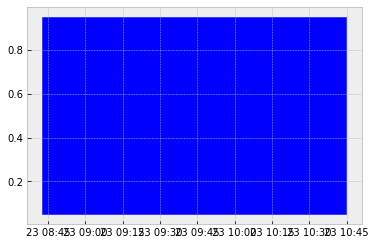

In [20]:
good_sections = boiler_meter.good_sections(full_results=True)
good_sections.plot()

Los fragmentos azules muestran dónde son buenos los datos. Una brecha blanca seria en datos incompletos en los datos de potencia bruta. Teoriacamente podria habermuchos huecos más pequeños que no podemos ver en este nivel de zoom.

También podemos ver las secciones exactas identificadas:

In [21]:
good_sections.combined()

[TimeFrame(start='2022-11-23 09:42:37+01:00', end='2022-11-23 11:44:48+01:00', empty=False)]

## Dropout rate (tasa de deserción )

Además de que puede aparecer grandes lagunas debido a que todo el sistema está inactivo, también podemo teners pequeñas lagunas frecuentes debido a que algunos sensores  arrojan datos. A esto a veces se le llama "abandono". La tasa de abandono es un número entre 0 y 1 que especifica la proporción de muestras que faltan. Una tasa de abandono de 0 significa que no faltan muestras. Un valor de 1 significaría que faltan todas las muestras:

In [22]:
boiler_meter.dropout_rate()

0.0

## Seleccion de subgrupos de medidores

Usamos ElecMeter.select_using_appliances () para seleccionar un nuevo MeterGroup usando un campo de metadatos. Por ejemplo, para obtener todas los ventiladore del conjunto de datos DSUALM::

In [23]:
import nilmtk
nilmtk.global_meter_group.select_using_appliances(type='fan')

MeterGroup(meters=
  ElecMeter(instance=9, building=1, dataset='DSUAL', appliances=[Appliance(type='fan', instance=1)])
)

O seleccione varios tipos de aparatos:

In [24]:
elec.select_using_appliances(type=['television', 'fan'])

MeterGroup(meters=
  ElecMeter(instance=4, building=1, dataset='DSUAL', appliances=[Appliance(type='television', instance=1)])
  ElecMeter(instance=9, building=1, dataset='DSUAL', appliances=[Appliance(type='fan', instance=1)])
)

O todos los electrodomésticos del edificio 1 con motor de inducción monofásico (!):

In [25]:
nilmtk.global_meter_group.select_using_appliances(building=1, category='single-phase induction motor')

MeterGroup(meters=
  ElecMeter(instance=2, building=1, dataset='DSUAL', appliances=[Appliance(type='electric furnace', instance=1)])
  ElecMeter(instance=6, building=1, dataset='DSUAL', appliances=[Appliance(type='vacuum cleaner', instance=1)])
  ElecMeter(instance=9, building=1, dataset='DSUAL', appliances=[Appliance(type='fan', instance=1)])
  ElecMeter(instance=10, building=1, dataset='DSUAL', appliances=[Appliance(type='fridge', instance=1)])
  ElecMeter(instance=11, building=1, dataset='DSUAL', appliances=[Appliance(type='freezer', instance=1)])
)

(NILMTK importa los 'metadatos comunes' del proyecto de metadatos NILM, que incluye una amplia gama de taxonomías de diferentes categorías)(http://nilm-metadata.readthedocs.org/en/latest/central_metadata.html#appliancetype))

## Medidas disponibles para cada medidor exceptuando la potencia

In [26]:
elec.available_physical_quantities() #todas las medidas del MeterGroup

['current', 'voltage', 'pf', 'frequency', 'power']

In [27]:
elec[1].available_physical_quantities() #medidas de ElecMeter 1 (mains)



['current', 'voltage', 'pf', 'frequency', 'power']

In [28]:
elec[2].available_physical_quantities() #medidas de ElecMeter 2 (boiler)


['current', 'voltage', 'pf', 'frequency', 'power']

In [29]:
elec[3].available_physical_quantities() #medidas de ElecMeter 3 (fan)


['current', 'voltage', 'pf', 'frequency', 'power']

In [30]:
elec[4].available_physical_quantities() #medidas de ElecMeter 4 (freezer)


['current', 'voltage', 'pf', 'frequency', 'power']

In [31]:
elec[5].available_physical_quantities() #medidas de ElecMeter 5 (television)


['current', 'voltage', 'pf', 'frequency', 'power']

In [32]:
elec[6].available_physical_quantities() #medidas de ElecMeter 6 (vacuum cleaner)


['current', 'voltage', 'pf', 'frequency', 'power']

In [33]:
elec[7].available_physical_quantities() #medidas de ElecMeter 6 (vacuum cleaner)

['current', 'voltage', 'pf', 'frequency', 'power']

In [34]:
elec[8].available_physical_quantities() #medidas de ElecMeter 6 (vacuum cleaner)

['current', 'voltage', 'pf', 'frequency', 'power']

In [35]:
elec[9].available_physical_quantities() #medidas de ElecMeter 6 (vacuum cleaner)

['current', 'voltage', 'pf', 'frequency', 'power']

In [36]:
elec[10].available_physical_quantities() #medidas de ElecMeter 6 (vacuum cleaner)

['current', 'voltage', 'pf', 'frequency', 'power']

In [37]:
elec[11].available_physical_quantities() #medidas de ElecMeter 6 (vacuum cleaner)

['current', 'voltage', 'pf', 'frequency', 'power']

## Medidas disponibles relativas a la potencia


In [38]:
elec[1].available_ac_types('power') #medidas de potencia de ElecMeter 1 

['active', 'apparent', 'reactive']

In [39]:
elec[2].available_ac_types('power') #medidas de potencia de ElecMeter 2

['active', 'apparent', 'reactive']

In [40]:
elec[3].available_ac_types('power') #medidas de potencia de ElecMeter 3

['active', 'apparent', 'reactive']

In [41]:
elec[4].available_ac_types('power') #medidas de potencia de ElecMeter 4

['active', 'apparent', 'reactive']

In [42]:
elec[5].available_ac_types('power') #medidas de potencia de ElecMeter 5

['active', 'apparent', 'reactive']

In [43]:
elec[6].available_ac_types('power') #medidas de potencia de ElecMeter 6

['active', 'apparent', 'reactive']

In [44]:
elec[7].available_ac_types('power') #medidas de potencia de ElecMeter 6

['active', 'apparent', 'reactive']

In [45]:
elec[8].available_ac_types('power') #medidas de potencia de ElecMeter 6

['active', 'apparent', 'reactive']

In [46]:
elec[9].available_ac_types('power') #medidas de potencia de ElecMeter 6

['active', 'apparent', 'reactive']

In [47]:
elec[10].available_ac_types('power') #medidas de potencia de ElecMeter 6

['active', 'apparent', 'reactive']

In [48]:
elec[11].available_ac_types('power') #medidas de potencia de ElecMeter 6

['active', 'apparent', 'reactive']

Del atributo 'elec' se puede obtener información de los medidores

En caso de consultar por una medición en específico, se pueden usar los siguientes tipos de mediciones tanto en ‘available_physical_quantities’ como en ‘available_ac_types’: 'power', 'energy', 'cumulative energy', 'voltage', 'current', 'pf', 'frequency', 'power factor', 'state', 'phase angle'.

### Medidas disponibles por electrodomestico o aparato

Podemos  ver las medidas desde otro punto de vista

Veamos qué medidas tenemos para el frigorífico,hervidor,luz,tv,etc:

In [5]:
fan = elec['fan']
fan.available_columns()

[('power', 'active'),
 ('pf', None),
 ('current', None),
 ('frequency', None),
 ('voltage', None),
 ('power', 'apparent'),
 ('power', 'reactive')]

In [6]:
kettle = elec['kettle']
kettle.available_columns()

[('power', 'active'),
 ('pf', None),
 ('current', None),
 ('frequency', None),
 ('voltage', None),
 ('power', 'apparent'),
 ('power', 'reactive')]

In [7]:
fan = elec['fan']
fan.available_columns()

[('power', 'active'),
 ('pf', None),
 ('current', None),
 ('frequency', None),
 ('voltage', None),
 ('power', 'apparent'),
 ('power', 'reactive')]

In [52]:
television = elec['television']
television.available_columns()

[('current', None),
 ('pf', None),
 ('power', 'apparent'),
 ('frequency', None),
 ('power', 'active'),
 ('voltage', None),
 ('power', 'reactive')]

In [53]:
microwave = elec['microwave']
microwave.available_columns()

[('current', None),
 ('pf', None),
 ('power', 'apparent'),
 ('frequency', None),
 ('power', 'active'),
 ('voltage', None),
 ('power', 'reactive')]

In [54]:
electric_furnace = elec['electric furnace']
electric_furnace.available_columns()

[('current', None),
 ('pf', None),
 ('power', 'apparent'),
 ('frequency', None),
 ('power', 'active'),
 ('voltage', None),
 ('power', 'reactive')]

In [55]:
electric_space_heater = elec['electric space heater']
electric_space_heater.available_columns()

[('current', None),
 ('pf', None),
 ('power', 'apparent'),
 ('frequency', None),
 ('power', 'active'),
 ('voltage', None),
 ('power', 'reactive')]

In [56]:
electric_shower_heater = elec['electric shower heater']
electric_shower_heater.available_columns()

[('current', None),
 ('pf', None),
 ('power', 'apparent'),
 ('frequency', None),
 ('power', 'active'),
 ('voltage', None),
 ('power', 'reactive')]

In [57]:
fridge = elec[10]
fridge.available_columns()

[('current', None),
 ('pf', None),
 ('power', 'apparent'),
 ('frequency', None),
 ('power', 'active'),
 ('voltage', None),
 ('power', 'reactive')]

In [58]:
freezer = elec[11]
freezer.available_columns()

[('current', None),
 ('pf', None),
 ('power', 'apparent'),
 ('frequency', None),
 ('power', 'active'),
 ('voltage', None),
 ('power', 'reactive')]

## Resumen de mediciones

Ahora veamos un resumen de las medidas disponibles por cada medidor

In [59]:
print('Mediciones disponibles - Dataset: '+str(elec.available_physical_quantities()))
print('Mediciones de Potencia disponibles - Dataset: '+str(elec.available_ac_types('power')))

print('\nMedidas disponibles por cada medidor:')
for x in range(len(labels)):
    print(str(labels['Meters'][x])+': '+str(elec[x+1].available_physical_quantities()))

print('\nMedidas de potencia por cada medidor:')  
for x in range(len(labels)):
    print(str(labels['Meters'][x])+': '+str(elec[x+1].available_ac_types('power')))

Mediciones disponibles - Dataset: ['current', 'voltage', 'pf', 'frequency', 'power']
Mediciones de Potencia disponibles - Dataset: ['apparent', 'reactive', 'active']

Medidas disponibles por cada medidor:
Main: ['current', 'voltage', 'pf', 'frequency', 'power']
Electric furnace: ['current', 'voltage', 'pf', 'frequency', 'power']
Microwave: ['current', 'voltage', 'pf', 'frequency', 'power']
Television: ['current', 'voltage', 'pf', 'frequency', 'power']
Kettle: ['current', 'voltage', 'pf', 'frequency', 'power']
Vacuum cleaner: ['current', 'voltage', 'pf', 'frequency', 'power']
Electric space heater: ['current', 'voltage', 'pf', 'frequency', 'power']
Electric shower heater: ['current', 'voltage', 'pf', 'frequency', 'power']
Fan: ['current', 'voltage', 'pf', 'frequency', 'power']
Fridge: ['current', 'voltage', 'pf', 'frequency', 'power']
Freezer: ['current', 'voltage', 'pf', 'frequency', 'power']

Medidas de potencia por cada medidor:
Main: ['active', 'apparent', 'reactive']
Electric furna

Los dispositivos se identifican de forma única dentro de un edificio por un tipo (luces, televisión, etc.) y un número de instancia. Si no se especifica un número de instancia, ElecMeter recupera la instancia 1.

### Esquema de red

In [60]:
 def draw_wiring_graph_2(self, show_meter_labels=True):
        graph = self.wiring_graph()
        
        try:
            # Try using graphviz layout...
            pos = nx.drawing.nx_agraph.graphviz_layout(graph, prog='dot')
            used_graphviz = True
        except:
            # ...and fallback to shell layout if graphviz is not installed or
            # doesn't work
            pos = nx.shell_layout(graph)
            used_graphviz = False
            
        meter_labels = {}
        if show_meter_labels:
            meter_labels = {meter: meter.label() for meter in graph.nodes()}
            for meter, name in meter_labels.items():
                x, y = pos[meter]

                if used_graphviz:
                    if meter.is_site_meter():
                        delta_y = 5
                    else:
                        delta_y = -5
                    
                    plt.text(x, y + delta_y, s=name, bbox=dict(facecolor='red', alpha=0.5), horizontalalignment='center')
       

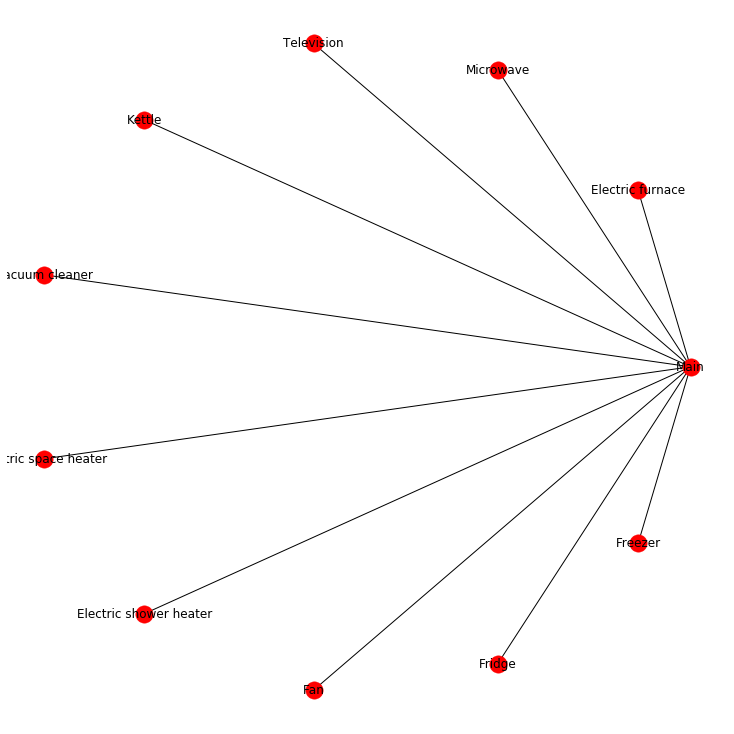

In [61]:
rcParams['figure.figsize'] = (10, 10)
fig = elec.draw_wiring_graph_2(show_meter_labels=False)

#etiquetas, opcional
pos = nx.shell_layout(fig[0])
nx.draw_networkx_labels(fig[0], pos, labels=Meters)

#guarda gráfico
plt.savefig('./data/images/2.1_Network.svg', bbox_inches='tight', transparent=True)
pass

NOTA: La funcion draw_wiring_graph  presenta problemas con Matplotlib 3.3.0 (y por tanto con NILMTK) segun issue 868 ( https://github.com/nilmtk/nilmtk/issues/868)), por lo que necesitamos reemplazar la función original para poder representar graficamente correctamente las etiquetas, por lo que vamos a crear la nueva funcion elec.draw_wiring_graph_2 que guardaremos en la ruta \user\USUARIO\anaconda3\envs\nilmtk-env\Lib\site-packages\nilmtk\metergroup.py

## Carga de datos en memoria

Intervalos de tiempo en que se registran datos: `elec[1]`

Timestamp en "timezone" es  "Europe/Madrid" https://www.epochconverter.com/

In [62]:
elec.get_timeframe()

TimeFrame(start='2022-11-23 09:42:37+01:00', end='2022-11-23 11:44:48+01:00', empty=False)

Una manera rápida de cargar varios datos de medidores en un DataFrame es utilizar la función `dataframe_of_meters` e indicar cual medida se desea importar desde el MeterGroup.

Observese que solo podemos tomar datos de potencia :active', 'apparent', 'reactive'.




Vamos a mostrar la potencia activa de los medidores del 2 al 6 (es decir todos menos el principal). 

In [10]:
Devices = elec.select(instance=[2,3,4,5,6,7,8,9,10,11])  #nuevo MeterGroup de dispositivos
df = Devices.dataframe_of_meters(ac_type='active') # active crea Dataframe badado en la potencia Valid AC types = ['active', 'apparent', 'reactive'].
#etiquetas
df.columns = [list(labels['Meters'][1:12])]
df

,Electric furnace,Microwave,Television,Kettle,Vacuum cleaner,Electric space heater,Electric shower heater,Fan,Fridge,Freezer
2022-11-23 09:42:00+01:00,7.554837,5.604559,3.145058,7.994596,4.861246,7.630107,8.176503,9.262337,6.899239,-12.500296
2022-11-23 09:43:00+01:00,139.882706,1106.393188,2.370991,24.074724,13.299744,7.606400,1316.843018,38.807529,6.500289,-9.139183
2022-11-23 09:44:00+01:00,152.628510,1282.057495,2.235140,25.480160,15.032664,7.642465,1498.680054,42.032478,6.437122,-9.906272
2022-11-23 09:45:00+01:00,30.801912,192.824402,2.857745,10.467288,682.216614,7.498873,221.534164,13.801193,6.788686,-7.688576
2022-11-23 09:46:00+01:00,7.250681,5.278989,3.064910,7.726341,772.201721,7.470716,8.075168,9.050780,6.678633,-9.850160
...,...,...,...,...,...,...,...,...,...,...
2022-11-23 11:40:00+01:00,82.593002,885.980286,-45.484280,13.947653,759.180420,6.457007,415.319458,41.147934,74.261139,-4.153830
2022-11-23 11:41:00+01:00,103.403137,1257.837646,-45.525463,17.403767,770.183044,6.794241,7.238750,41.808971,72.110596,-7.347779
2022-11-23 11:42:00+01:00,98.142876,1244.870361,-45.263954,13.934137,222.184586,6.674631,7.403491,41.919559,71.082542,1.387545
2022-11-23 11:43:00+01:00,89.975273,1234.288574,-44.987724,15.786836,10.809386,6.811280,7.437215,42.115566,70.218163,-4.929552


Ahora veamos la potencia reactiva de los medidores del 2 al 6 (todos menos el principal).

In [64]:
Devices = elec.select(instance=[2,3,4,5,6,7,8,9,10,11])  #nuevo MeterGroup de dispositivos
df = Devices.dataframe_of_meters(ac_type='reactive') # active crea Dataframe badado en la potencia Valid AC types = ['active', 'apparent', 'reactive'].
#etiquetas
df.columns = [list(labels['Meters'][1:12])]
df

,Electric furnace,Microwave,Television,Kettle,Vacuum cleaner,Electric space heater,Electric shower heater,Fan,Fridge,Freezer
2022-11-23 09:42:00+01:00,-1.609140,-2.178170,-2.978904,-2.126848,-1.146904,-4.229957,-3.143566,-3.338242,-1.900519,-12.538783
2022-11-23 09:43:00+01:00,-39.679588,357.090271,-2.663362,-7.582127,-4.270566,-3.910896,0.169619,-2.556219,-1.843964,-7.791082
2022-11-23 09:44:00+01:00,-45.288887,356.369904,-2.632999,-7.940348,-4.280152,-3.987523,0.489160,-2.572345,-1.800371,-6.852597
2022-11-23 09:45:00+01:00,-9.280095,46.884972,-2.965994,-3.067759,45.062008,-3.877455,-2.528671,-3.190422,-1.848366,-9.333098
2022-11-23 09:46:00+01:00,-1.688563,-2.081594,-2.971325,-1.962322,49.809319,-4.086592,-3.019976,-3.290935,-1.867615,-7.113080
...,...,...,...,...,...,...,...,...,...,...
2022-11-23 11:40:00+01:00,-27.880144,276.165253,9.557875,-4.912838,43.997257,-2.569472,-1.513714,-2.671240,7.785942,-5.919390
2022-11-23 11:41:00+01:00,-35.047226,339.897491,9.242660,-6.126199,42.922066,-3.580361,-2.454037,-2.736917,7.919539,-3.880686
2022-11-23 11:42:00+01:00,-35.493946,335.821777,8.794584,-6.338023,8.306940,-1.927284,-2.449997,-2.708219,8.077969,-8.921979
2022-11-23 11:43:00+01:00,-34.060822,321.522339,8.915532,-6.146550,-3.632195,-3.416040,-2.475599,-2.748713,7.952411,-7.869693


Por ultimo, veamos la potencia aparente de los medidores del 2 al 6 (todos menos el principal).

In [65]:
Devices = elec.select(instance=[2,3,4,5,6,7,8,9,10,11])  #nuevo MeterGroup de dispositivos
df = Devices.dataframe_of_meters(ac_type='apparent') # active crea Dataframe badado en la potencia Valid AC types = ['active', 'apparent', 'reactive'].
#etiquetas
df.columns = [list(labels['Meters'][1:12])]
df

,Electric furnace,Microwave,Television,Kettle,Vacuum cleaner,Electric space heater,Electric shower heater,Fan,Fridge,Freezer
2022-11-23 09:42:00+01:00,7.730257,6.023747,4.346776,8.280984,5.004723,8.745358,8.764638,9.850656,7.161414,22.292055
2022-11-23 09:43:00+01:00,145.521973,1176.271973,3.672231,25.337780,14.585597,8.848810,1316.916504,38.948315,6.760989,18.107990
2022-11-23 09:44:00+01:00,159.306503,1330.754272,3.480889,26.708021,15.651441,8.644539,1498.680298,42.111874,6.688788,16.960888
2022-11-23 09:45:00+01:00,32.200890,199.421280,4.254364,10.979543,683.943848,9.268678,222.000076,14.316977,7.040811,19.593590
2022-11-23 09:46:00+01:00,7.449341,5.683506,4.279713,7.976957,773.806641,8.522509,8.625785,9.633842,6.939564,16.690388
...,...,...,...,...,...,...,...,...,...,...
2022-11-23 11:40:00+01:00,87.311455,944.149231,46.502342,15.448554,760.501648,8.802677,415.621979,41.237835,74.671371,23.025351
2022-11-23 11:41:00+01:00,109.268707,1303.092041,46.455532,18.465807,771.386841,7.895814,7.649707,41.899357,72.545586,13.611448
2022-11-23 11:42:00+01:00,104.466072,1289.489014,46.120468,15.808880,226.735474,9.027361,7.803102,42.009880,71.542542,23.892109
2022-11-23 11:43:00+01:00,96.313560,1275.601685,45.864849,16.956591,11.445709,7.840866,7.844068,42.206604,70.668991,20.124210


Se puede obtener el tipo de datos usado para cada medidor usandola clase info

In [66]:
df.info() #información del DataFrame

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 123 entries, 2022-11-23 09:42:00+01:00 to 2022-11-23 11:44:00+01:00
Freq: 60S
Data columns (total 10 columns):
(Electric furnace,)          123 non-null float32
(Microwave,)                 123 non-null float32
(Television,)                123 non-null float32
(Kettle,)                    123 non-null float32
(Vacuum cleaner,)            123 non-null float32
(Electric space heater,)     123 non-null float32
(Electric shower heater,)    123 non-null float32
(Fan,)                       123 non-null float32
(Fridge,)                    123 non-null float32
(Freezer,)                   123 non-null float32
dtypes: float32(10)
memory usage: 5.8 KB


Podemos asignar individualmente datos de medidores en un Dataframe




Vemos para el meter nº 2(horno) con datos capturados de 09:40 a 11:44 tenemos la siguinte tabla que nos muestra todas las medidas

In [67]:
t0 = '2022-11-23 09:40:00+01:00' #tiempo inicial
t1 = '2022-11-23 11:44:00+01:00' #tiempo final


df_ef = next(elec[2].load())[t0:t1] #DataFrame medidor 
df_ef

physical_quantity,current,pf,power,frequency,power,voltage,power
type,,,apparent,,active,,reactive
2022-11-23 09:42:37+01:00,0.036610,0.779828,7.218613,50.048401,7.008195,245.471497,-1.691935
2022-11-23 09:42:38+01:00,0.039942,0.783627,7.872020,50.048519,7.683460,245.451401,-1.697002
2022-11-23 09:42:39+01:00,0.037553,0.815136,7.685831,50.046101,7.506026,245.270599,-1.635726
2022-11-23 09:42:40+01:00,0.038323,0.774195,7.424030,50.042881,7.278238,245.255005,-1.403614
2022-11-23 09:42:41+01:00,0.039820,0.776545,7.774941,50.042179,7.585696,245.396606,-1.686918
...,...,...,...,...,...,...,...
2022-11-23 11:43:56+01:00,0.256968,0.790626,51.501846,50.017181,48.658779,242.005997,-16.832500
2022-11-23 11:43:57+01:00,0.545914,0.735930,103.951401,50.019161,97.173424,242.037201,-36.917320
2022-11-23 11:43:58+01:00,1.107027,0.735015,215.256805,50.021042,197.249603,242.054810,-86.111237


Se puede visualizar solo la cabecera de los datos

In [68]:
df_ef.head()

physical_quantity,current,pf,power,frequency,power,voltage,power
type,,,apparent,,active,,reactive
2022-11-23 09:42:37+01:00,0.036610,0.779828,7.218613,50.048401,7.008195,245.471497,-1.691935
2022-11-23 09:42:38+01:00,0.039942,0.783627,7.872020,50.048519,7.683460,245.451401,-1.697002
2022-11-23 09:42:39+01:00,0.037553,0.815136,7.685831,50.046101,7.506026,245.270599,-1.635726
2022-11-23 09:42:40+01:00,0.038323,0.774195,7.424030,50.042881,7.278238,245.255005,-1.403614
2022-11-23 09:42:41+01:00,0.039820,0.776545,7.774941,50.042179,7.585696,245.396606,-1.686918


Vemos para el meter nº 3( microondas) con datos capturados de  09:40 a 11:44  tenemos la siguinte tabla que nos muestra todas las medidas

In [69]:
t0 = '2022-11-23 09:40:00+01:00' #tiempo inicial
t1 = '2022-11-23 11:44:00+01:00' #tiempo final


df_m = next(elec[3].load())[t0:t1] #DataFrame medidor 
df_m

physical_quantity,current,pf,power,frequency,power,voltage,power
type,,,apparent,,active,,reactive
2022-11-23 09:42:37+01:00,0.033512,0.643803,5.815043,50.048401,5.301840,245.471497,-2.379925
2022-11-23 09:42:38+01:00,0.037492,0.648812,6.294611,50.048519,5.886174,245.451401,-2.224998
2022-11-23 09:42:39+01:00,0.031056,0.707318,5.890838,50.046101,5.387454,245.270599,-2.375060
2022-11-23 09:42:40+01:00,0.037997,0.617084,6.193004,50.042881,5.673236,245.255005,-2.471152
2022-11-23 09:42:41+01:00,0.034311,0.641345,5.820299,50.042179,5.387128,245.396606,-2.180070
...,...,...,...,...,...,...,...
2022-11-23 11:43:56+01:00,5.820308,0.867945,1261.312622,50.017181,1222.541992,242.005997,310.326813
2022-11-23 11:43:57+01:00,5.910146,0.868338,1280.299683,50.019161,1242.140015,242.037201,310.228607
2022-11-23 11:43:58+01:00,5.963478,0.873166,1294.782593,50.021042,1260.410034,242.054810,296.258789


Vemos para el meter nº 4(television) con datos capturados de  09:40 a 11:44  tenemos  la siguinte tabla que nos muestra todas las medidas: 

In [70]:
t0 = '2022-11-23 09:40:00+01:00' #tiempo inicial
t1 = '2022-11-23 11:44:00+01:00' #tiempo final


df_ef = next(elec[4].load())[t0:t1] #DataFrame medidor boiler
df_ef

physical_quantity,current,pf,power,frequency,power,voltage,power
type,,,apparent,,active,,reactive
2022-11-23 09:42:37+01:00,0.034573,0.392395,4.348816,50.026501,3.311053,244.163010,-2.819200
2022-11-23 09:42:38+01:00,0.035473,0.373073,4.416190,50.026741,3.224916,244.117996,-3.009866
2022-11-23 09:42:39+01:00,0.034330,0.362825,4.221698,50.027061,3.037626,243.939209,-2.927656
2022-11-23 09:42:40+01:00,0.033164,0.400908,4.331031,50.027382,3.240672,243.973404,-2.852438
2022-11-23 09:42:41+01:00,0.033638,0.388712,4.500410,50.027538,3.183706,244.042801,-3.170580
...,...,...,...,...,...,...,...
2022-11-23 11:43:56+01:00,0.334455,-0.554560,45.529900,50.031822,-44.652939,240.747406,8.887266
2022-11-23 11:43:57+01:00,0.335385,-0.556517,45.847603,50.031059,-44.938419,240.763397,9.081794
2022-11-23 11:43:58+01:00,0.339315,-0.560959,46.764145,50.030521,-45.828281,240.762604,9.305268


Veamos para el meter nº 5(tetera)  con datos capturados de 10:16 a 12:58 tenemos la siguinte tabla que nos muestra todas las medidas

In [71]:
t0 = '2022-11-23 09:40:00+01:00' #tiempo inicial
t1 = '2022-11-23 11:44:00+01:00' #tiempo final



df_sh = next(elec[5].load())[t0:t1] #DataFrame medidor boiler
df_sh

physical_quantity,current,pf,power,frequency,power,voltage,power
type,,,apparent,,active,,reactive
2022-11-23 09:42:37+01:00,0.042621,0.766849,8.390131,50.048401,8.022565,245.471497,-2.436065
2022-11-23 09:42:38+01:00,0.045963,0.741531,8.432961,50.048519,8.201234,245.451401,-1.955226
2022-11-23 09:42:39+01:00,0.038741,0.835490,8.199463,50.046101,7.934630,245.270599,-2.028178
2022-11-23 09:42:40+01:00,0.070312,0.523265,8.719223,50.042881,8.481362,245.255005,-1.902111
2022-11-23 09:42:41+01:00,0.042226,0.772082,8.289274,50.042179,7.990514,245.396606,-2.189230
...,...,...,...,...,...,...,...
2022-11-23 11:43:56+01:00,0.050935,0.813553,10.733043,50.017181,10.033002,242.005997,-3.804962
2022-11-23 11:43:57+01:00,0.088999,0.786156,18.127777,50.019161,16.899780,242.037201,-6.547542
2022-11-23 11:43:58+01:00,0.148063,0.783217,30.526554,50.021042,28.016979,242.054810,-12.114081


Veamos para el meter nº 6(Aspiradora) con datos capturados de  09:40 a 11:44  tenemos la siguinte tabla que nos muestra todas las medidas

In [72]:
t0 = '2022-11-23 09:40:00+01:00' #tiempo inicial
t1 = '2022-11-23 11:44:00+01:00' #tiempo final



df_vc = next(elec[6].load())[t0:t1] #DataFrame medidor boiler
df_vc

physical_quantity,current,pf,power,frequency,power,voltage,power
type,,,apparent,,active,,reactive
2022-11-23 09:42:37+01:00,0.030625,0.659551,5.048005,50.048401,4.958965,245.471497,-0.937101
2022-11-23 09:42:38+01:00,0.031928,0.604281,4.792064,50.048519,4.706938,245.451401,-0.814582
2022-11-23 09:42:39+01:00,0.028700,0.706262,5.089903,50.046101,4.958764,245.270599,-1.116455
2022-11-23 09:42:40+01:00,0.031964,0.613967,4.972781,50.042881,4.804644,245.255005,-1.252909
2022-11-23 09:42:41+01:00,0.031026,0.633551,4.896050,50.042179,4.785002,245.396606,-0.964646
...,...,...,...,...,...,...,...
2022-11-23 11:43:56+01:00,0.035673,0.753037,6.810810,50.017181,6.501002,242.005997,-2.005968
2022-11-23 11:43:57+01:00,0.067788,0.748385,12.442278,50.019161,11.782276,242.037201,-3.972838
2022-11-23 11:43:58+01:00,0.109343,0.777308,22.312353,50.021042,20.547979,242.054810,-8.670319


Veamos para el ultimo meter nº 7(estufa de aceite) con datos capturados  09:40 a 11:44  tenemos la siguinte tabla que nos muestra todas las medidas

In [73]:
t0 = '2022-11-23 09:40:00+01:00' #tiempo inicial
t1 = '2022-11-23 11:44:00+01:00' #tiempo final


df_sph = next(elec[7].load())[t0:t1] #DataFrame medidor boiler
df_sph

physical_quantity,current,pf,power,frequency,power,voltage,power
type,,,apparent,,active,,reactive
2022-11-23 09:42:37+01:00,0.048713,0.647169,8.803709,50.026501,7.688360,244.163010,-4.287354
2022-11-23 09:42:38+01:00,0.047700,0.631649,8.464948,50.026741,7.350082,244.117996,-4.187374
2022-11-23 09:42:39+01:00,0.047439,0.670606,8.863949,50.027061,7.755834,243.939209,-4.279052
2022-11-23 09:42:40+01:00,0.048531,0.644874,8.672079,50.027382,7.622192,243.973404,-4.133152
2022-11-23 09:42:41+01:00,0.047812,0.682787,9.041894,50.027538,7.944346,244.042801,-4.311330
...,...,...,...,...,...,...,...
2022-11-23 11:43:56+01:00,0.042609,0.642655,7.369793,50.031822,6.546618,240.747406,-3.380960
2022-11-23 11:43:57+01:00,0.044183,0.680938,8.100521,50.031059,7.249322,240.763397,-3.602414
2022-11-23 11:43:58+01:00,0.053483,0.606897,8.789153,50.030521,7.725170,240.762604,-4.177090


Veamos para el ultimo meter nº 8(calentador de agua) con datos capturados 09:40 a 11:44 tenemos la siguinte tabla que nos muestra todas las medidas

In [74]:
t0 = '2022-11-23 09:40:00+01:00' #tiempo inicial
t1 = '2022-11-23 11:44:00+01:00' #tiempo final


df_shh = next(elec[8].load())[t0:t1] #DataFrame medidor boiler
df_shh

physical_quantity,current,pf,power,frequency,power,voltage,power
type,,,apparent,,active,,reactive
2022-11-23 09:42:37+01:00,0.041406,0.818290,8.917756,50.055698,8.261640,243.869003,-3.353425
2022-11-23 09:42:38+01:00,0.040693,0.804124,8.580359,50.054581,7.973274,243.822800,-3.134924
2022-11-23 09:42:39+01:00,0.041473,0.806560,8.762921,50.056358,8.147924,243.635605,-3.218770
2022-11-23 09:42:40+01:00,0.042011,0.786387,8.633279,50.058399,8.048518,243.720596,-3.103774
2022-11-23 09:42:41+01:00,0.042185,0.802355,8.886698,50.055962,8.249068,243.736206,-3.297510
...,...,...,...,...,...,...,...
2022-11-23 11:43:56+01:00,0.037253,0.822687,7.667698,50.043400,7.369114,240.412399,-2.109498
2022-11-23 11:43:57+01:00,0.037926,0.829841,7.964127,50.044041,7.563432,240.446594,-2.488964
2022-11-23 11:43:58+01:00,0.038216,0.811492,7.892020,50.044678,7.449740,240.464203,-2.592990


Veamos para el ultimo meter nº 9(ventilador) con datos capturados 09:40 a 11:44 tenemos la siguinte tabla que nos muestra todas las medidas

In [75]:
t0 = '2022-11-23 09:40:00+01:00' #tiempo inicial
t1 = '2022-11-23 11:44:00+01:00' #tiempo final


df_fan = next(elec[9].load())[t0:t1] #DataFrame medidor boiler
df_fan

physical_quantity,current,pf,power,frequency,power,voltage,power
type,,,apparent,,active,,reactive
2022-11-23 09:42:37+01:00,0.044349,0.862872,9.835068,50.055698,9.332075,243.869003,-3.104715
2022-11-23 09:42:38+01:00,0.046049,0.820335,9.767329,50.054581,9.187424,243.822800,-3.286294
2022-11-23 09:42:39+01:00,0.044600,0.841487,9.681238,50.056358,9.140324,243.635605,-3.188080
2022-11-23 09:42:40+01:00,0.047785,0.798678,9.883257,50.058399,9.303112,243.720596,-3.323186
2022-11-23 09:42:41+01:00,0.045379,0.824919,9.793088,50.055962,9.124446,243.736206,-3.534008
...,...,...,...,...,...,...,...
2022-11-23 11:43:56+01:00,0.177590,0.989758,42.343616,50.043400,42.257759,240.412399,-2.687996
2022-11-23 11:43:57+01:00,0.177975,0.989694,42.436432,50.044041,42.352520,240.446594,-2.647218
2022-11-23 11:43:58+01:00,0.177625,0.987977,42.281990,50.044678,42.198921,240.464203,-2.634974


Veamos para el ultimo meter nº 10(nevera) con datos capturados 09:40 a 11:44 tenemos la siguinte tabla que nos muestra todas las medidas

In [76]:
t0 = '2022-11-23 09:40:00+01:00' #tiempo inicial
t1 = '2022-11-23 11:44:00+01:00' #tiempo final


df_fridge = next(elec[10].load())[t0:t1] #DataFrame medidor boiler
df_fridge

physical_quantity,current,pf,power,frequency,power,voltage,power
type,,,apparent,,active,,reactive
2022-11-23 09:42:37+01:00,0.033883,0.828948,7.053345,50.055698,6.850785,243.869003,-1.662740
2022-11-23 09:42:38+01:00,0.036703,0.771782,7.180398,50.054581,6.900064,243.822800,-1.979324
2022-11-23 09:42:39+01:00,0.035708,0.793397,7.152791,50.056358,6.897198,243.635605,-1.874150
2022-11-23 09:42:40+01:00,0.037244,0.765440,7.233483,50.058399,6.947278,243.720596,-1.985642
2022-11-23 09:42:41+01:00,0.036331,0.768497,7.050983,50.055962,6.804724,243.736206,-1.822950
...,...,...,...,...,...,...,...
2022-11-23 11:43:56+01:00,0.305636,0.951055,70.351494,50.043400,69.882217,240.412399,8.101668
2022-11-23 11:43:57+01:00,0.306228,0.951025,70.468529,50.044041,70.025536,240.446594,7.879312
2022-11-23 11:43:58+01:00,0.305607,0.951762,70.396072,50.044678,69.942879,240.464203,7.967888


Veamos para el ultimo meter nº 11(congelador) con datos capturados 09:40 a 11:44 tenemos la siguinte tabla que nos muestra todas las medidas

In [77]:
t0 = '2022-11-23 09:40:00+01:00' #tiempo inicial
t1 = '2022-11-23 11:44:00+01:00' #tiempo final


df_freezer = next(elec[11].load())[t0:t1] #DataFrame medidor boiler
df_freezer

physical_quantity,current,pf,power,frequency,power,voltage,power
type,,,apparent,,active,,reactive
2022-11-23 09:42:37+01:00,1.221330,-0.045735,28.705669,50.055698,-13.530750,243.869003,-24.954651
2022-11-23 09:42:38+01:00,1.215960,-0.064761,21.461523,50.054581,-19.120260,243.822800,-9.305424
2022-11-23 09:42:39+01:00,1.330944,-0.025518,16.422134,50.056358,-7.323244,243.635605,-6.509572
2022-11-23 09:42:40+01:00,1.264714,-0.035756,26.768635,50.058399,-10.817841,243.720596,-21.070179
2022-11-23 09:42:41+01:00,1.232678,-0.040565,17.480663,50.055962,-12.161116,243.736206,-8.253134
...,...,...,...,...,...,...,...
2022-11-23 11:43:56+01:00,1.370302,-0.041197,17.247124,50.043400,-11.492090,240.412399,0.939928
2022-11-23 11:43:57+01:00,1.218180,-0.038942,18.277155,50.044041,-11.201049,240.446594,-7.463754
2022-11-23 11:43:58+01:00,1.220172,-0.031521,17.437828,50.044678,-8.696420,240.464203,-5.339764


### Proporcion de energia submedida

Calculemos la proporción de energía submedida en el edificio 1:

In [78]:
elec.proportion_of_energy_submetered()

Running MeterGroup.proportion_of_energy_submetered...


1.0603556414686468

Tenga en cuenta que NILMTK ha emitido una advertencia de que Mains usa un tipo diferente de medición de potencia que todos los submedidores, por lo que no es una comparación del todo precisa. Lo que plantea la pregunta: ¿qué tipo de medidas de potencia se utilizan para la red y los submedidores? Vamos a averiguar.

### Carga una columna simple de datos de  potencia

Usar fan.power_series() que devuelve un generador de objetos pandas.Series unidimensionales, cada uno de los cuales contiene datos de energía utilizando el tipo de CA más 'sensible':

In [79]:
series = next(fan.power_series())
series.head()

2022-11-23 09:42:37+01:00    4.958965
2022-11-23 09:42:38+01:00    4.706938
2022-11-23 09:42:39+01:00    4.958764
2022-11-23 09:42:40+01:00    4.804644
2022-11-23 09:42:41+01:00    4.785002
Name: (power, active), dtype: float32

o, para obtener potencia reactiva:

In [80]:
series = next(fan.power_series(ac_type='reactive'))
series.head()

2022-11-23 09:42:37+01:00   -0.937101
2022-11-23 09:42:38+01:00   -0.814582
2022-11-23 09:42:39+01:00   -1.116455
2022-11-23 09:42:40+01:00   -1.252909
2022-11-23 09:42:41+01:00   -0.964646
Name: (power, reactive), dtype: float32

### Especificar cantidad_física o tipo de CA

In [81]:
df = next(fan.load(physical_quantity='power', ac_type='reactive'))
df.head()

physical_quantity,power
type,reactive
2022-11-23 09:42:37+01:00,-0.937101
2022-11-23 09:42:38+01:00,-0.814582
2022-11-23 09:42:39+01:00,-1.116455
2022-11-23 09:42:40+01:00,-1.252909
2022-11-23 09:42:41+01:00,-0.964646


Para cargar datos de voltaje:

In [82]:
df = next(fan.load(physical_quantity='voltage'))
df.head()

physical_quantity,voltage
type,
2022-11-23 09:42:37+01:00,245.471497
2022-11-23 09:42:38+01:00,245.451401
2022-11-23 09:42:39+01:00,245.270599
2022-11-23 09:42:40+01:00,245.255005
2022-11-23 09:42:41+01:00,245.396606


In [83]:
df = next(fan.load(physical_quantity = 'power'))
df.head()

physical_quantity             power                    
type                       apparent    active  reactive
2022-11-23 09:42:37+01:00  5.048005  4.958965 -0.937101
2022-11-23 09:42:38+01:00  4.792064  4.706938 -0.814582
2022-11-23 09:42:39+01:00  5.089903  4.958764 -1.116455
2022-11-23 09:42:40+01:00  4.972781  4.804644 -1.252909
2022-11-23 09:42:41+01:00  4.896050  4.785002 -0.964646

### Cargando especificando el tipo de CA

In [84]:
df = next(fan.load(ac_type='active'))
df.head()

physical_quantity,power
type,active
2022-11-23 09:42:37+01:00,4.958965
2022-11-23 09:42:38+01:00,4.706938
2022-11-23 09:42:39+01:00,4.958764
2022-11-23 09:42:40+01:00,4.804644
2022-11-23 09:42:41+01:00,4.785002


### Cargando por remuestreo a un período específico

In [85]:
# resample por minutos (i.e. con un simple periodo de  60 secs)
df = next(fan.load(ac_type='active', sample_period=60))
df.head()

physical_quantity,power
type,active
2022-11-23 09:42:00+01:00,4.861246
2022-11-23 09:43:00+01:00,13.299744
2022-11-23 09:44:00+01:00,15.032664
2022-11-23 09:45:00+01:00,682.216614
2022-11-23 09:46:00+01:00,772.201721


# Estadisticas para MeterGroups

Calculemos la proporción de energía submedida en el edificio 1 

In [86]:
elec.proportion_of_energy_submetered()

Running MeterGroup.proportion_of_energy_submetered...


1.0603556414686468

## Potencia activa, aparente y reactiva

In [87]:
mains = elec.mains()
mains.available_ac_types('power')
elec.submeters().available_ac_types('power')
next(elec.load())

Loading data for meter ElecMeterID(instance=11, building=1, dataset='DSUAL')     
Done loading data all meters for this chunk.


physical_quantity,current,pf,power,frequency,power,voltage,power
type,NaN,NaN,apparent,NaN,active,NaN,reactive
2022-11-23 09:42:00+01:00,NaN,NaN,107.785736,NaN,66.764656,NaN,-42.575123
2022-11-23 09:43:00+01:00,NaN,NaN,5167.283691,NaN,5030.670898,NaN,635.057922
2022-11-23 09:44:00+01:00,NaN,NaN,5868.067871,NaN,5759.236816,NaN,630.291321
2022-11-23 09:45:00+01:00,NaN,NaN,2324.063232,NaN,2278.071533,NaN,144.516953
2022-11-23 09:46:00+01:00,NaN,NaN,1666.303589,NaN,1632.465332,NaN,65.568398
...,...,...,...,...,...,...,...
2022-11-23 11:40:00+01:00,NaN,NaN,4643.569824,NaN,4421.392578,NaN,599.645996
2022-11-23 11:41:00+01:00,NaN,NaN,4557.379395,NaN,4357.027344,NaN,716.777588
2022-11-23 11:42:00+01:00,NaN,NaN,3487.574707,NaN,3274.983154,NaN,650.650879


### Energia Total

In [88]:
elec.mains().total_energy() # returns kWh

apparent    4.264153
reactive    0.166318
active      4.252499
dtype: float64

In [89]:
#energía por submedidor kwH diaria promedio
d1=elec.energy_per_meter(ac_type=['active'], per_period='D').round(2) # kWh, per_period='D'
#energía por submedidor kwH semanal promedio
d2=elec.energy_per_meter(ac_type=['active'], per_period='W').round(2) # kWh, per_period='W'
#energía por submedidor kwH total
d3=elec.energy_per_meter(ac_type=['active'], per_period='M').round(2) # kWh, per_period='D'

#df=d1.append([d2,d3]).drop(index=['apparent', 'reactive']).transpose()

df=d1.append([d2,d3]).drop(index=['apparent', 'reactive']).transpose()


df.index = [list(labels['Meters'])]
df.columns = ['kWh Día','kWh Sem.','kwh Mens']
df

11/11 ElecMeter(instance=11, building=1, dataset='DSUAL', appliances=[Appliance(type='freezer', instance=1)])instance=1)])

,kWh Día,kWh Sem.,kwh Mens
Main,50.12,350.83,1553.66
Electric furnace,9.53,66.74,295.56
Microwave,5.47,38.27,169.49
Television,0.04,0.26,1.14
Kettle,6.97,48.81,216.17
Vacuum cleaner,4.39,30.72,136.04
Electric space heater,10.40,72.80,322.39
Electric shower heater,12.70,88.90,393.70
Fan,0.58,4.09,18.09
Fridge,0.88,6.19,27.43


### Energia por submedidor

Veamos la energia  para el submedidor

In [90]:
energy_per_meter = elec.submeters().energy_per_meter() # kWh, again
energy_per_meter

10/10 ElecMeter(instance=11, building=1, dataset='DSUAL', appliances=[Appliance(type='freezer', instance=1)])instance=1)])

,"(2, 1, DSUAL)","(3, 1, DSUAL)","(4, 1, DSUAL)","(5, 1, DSUAL)","(6, 1, DSUAL)","(7, 1, DSUAL)","(8, 1, DSUAL)","(9, 1, DSUAL)","(10, 1, DSUAL)","(11, 1, DSUAL)"
active,0.808966,0.463895,0.003112,0.59168,0.372348,0.882403,1.0776,0.049524,0.075078,0.001059
apparent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
reactive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Los encabezados de columna son los números de instancia de ElecMeter.

La funcion `fraction_per_meter` lo mismo que `energy_per_submeter` excepto que devuelve la fraccion de energia por medidor

Seleccionar contadores en función de su consumo energético

Hagamos un nuevo MeterGroup que solo contenga los ElecMeters que usaron más de 20 kWh:

In [91]:
# energy_per_meter es un DataFrame donde cada fila es un
# tipo de potencia ('activa', 'reactiva' o 'aparente').
# Todos los medidores de electrodomésticos en REDD están registrados como 'activos', así que seleccione
# la fila 'activa':
energy_per_meter = energy_per_meter.loc['active']
more_than_20 = energy_per_meter[energy_per_meter > 20]
more_than_20

Series([], Name: active, dtype: float64)

In [92]:
instances = more_than_20.index
instances

Index([], dtype='object')

### Trazar la fracción del consumo de energía de cada aparato

In [93]:
fraction = elec.submeters().fraction_per_meter().dropna()

10/10 ElecMeter(instance=11, building=1, dataset='DSUAL', appliances=[Appliance(type='freezer', instance=1)])instance=1)])

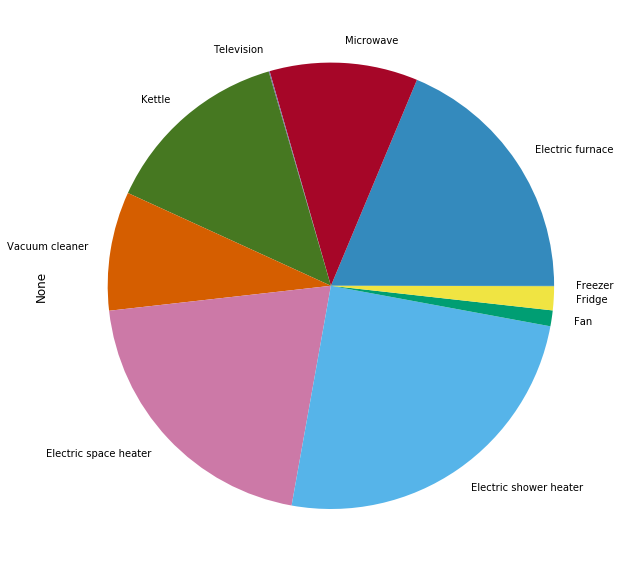

In [94]:
# Creacion de convenientes etiquetas
labels = elec.get_labels(fraction.index)
plt.figure(figsize=(10,30))
fraction.plot(kind='pie', labels=labels);

## Gráficos

### Horno

Ahora vamos a mostrar los diferentes de la potencia, tension y corriente

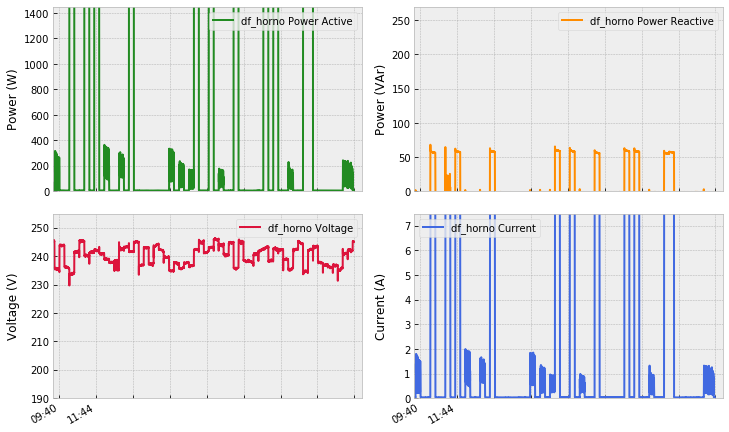

In [17]:
tt0 = '2022-11-23 09:42:37+01:00' #tiempo inicial
t1 = '2022-11-23 11:44:48+01:00' #tiempo final

df_ef = next(elec[2].load())[t0:t1] #DataFrame medidor 

#graficos

rcParams['figure.figsize'] = (12, 8)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, gridspec_kw={'hspace': 0.12, 'wspace': 0.17})

df_ef['power', 'active'].plot(ax=ax1,color='forestgreen')
ax1.legend(['df_horno Power Active'])
ax1.set(ylabel='Power (W)')
ax1.set_ylim([0,1450])

df_ef['power', 'reactive'].plot(ax=ax2,color='darkorange')
ax2.legend(['df_horno Power Reactive'])
ax2.set(ylabel='Power (VAr)')
ax2.set_ylim([0,270])

df_ef['voltage'].plot(ax=ax3,color='crimson')
ax3.legend(['df_horno Voltage'])
ax3.set(ylabel='Voltage (V)')
ax3.set_ylim([190,255])

df_ef['current'].plot(ax=ax4,color='royalblue')
ax4.legend(['df_horno Current'])
ax4.set(ylabel='Current (A)')
ax4.set_ylim([0,7.5])


ax1.set(xlim=('2022-11-23 09:42:37+01:00','2022-11-23 11:48+01:00'))
ax1.minorticks_off()
ax1.set_xticklabels(['09:40','11:44'])
fig.align_ylabels([(ax1,ax2,ax3,ax4)])

#guarda gráfico
plt.savefig('./data/images/df_horno.svg', bbox_inches='tight', transparent=True)
pass

### Microondas

Veamos ahora en forma de grafico las potencias activa y reactiva junto a la tension y la corriente para el medidor numero 3 (microondas)

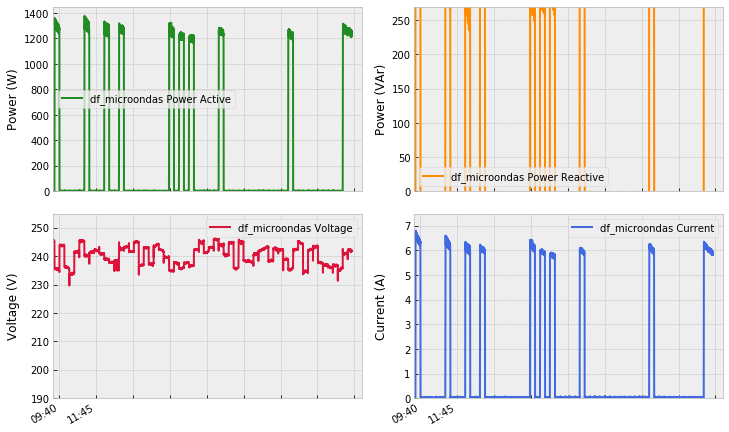

In [18]:
t0 = '2022-11-23 09:40:00+01:00' #tiempo inicial
t1 = '2022-11-23 11:44:00+01:00' #tiempo final
df_mi = next(elec[3].load())[t0:t1] #DataFrame medidor 


rcParams['figure.figsize'] = (12, 8)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, gridspec_kw={'hspace': 0.12, 'wspace': 0.17})

df_mi['power', 'active'].plot(ax=ax1,color='forestgreen')
ax1.legend(['df_microondas Power Active'])
ax1.set(ylabel='Power (W)')
ax1.set_ylim([0,1450])

df_mi['power', 'reactive'].plot(ax=ax2,color='darkorange')
ax2.legend(['df_microondas Power Reactive'])
ax2.set(ylabel='Power (VAr)')
ax2.set_ylim([0,270])

df_mi['voltage'].plot(ax=ax3,color='crimson')
ax3.legend(['df_microondas Voltage'])
ax3.set(ylabel='Voltage (V)')
ax3.set_ylim([190,255])

df_mi['current'].plot(ax=ax4,color='royalblue')
ax4.legend(['df_microondas Current'])
ax4.set(ylabel='Current (A)')
ax4.set_ylim([0,7.5])

ax1.set(xlim=('2022-11-23 09:42:37+01:00','2022-11-23 11:48+01:00'))
ax1.minorticks_off()
ax1.set_xticklabels(['09:40','11:45'])
fig.align_ylabels([(ax1,ax2,ax3,ax4)])

#guarda gráfico
plt.savefig('./data/images/df_microondas.svg', bbox_inches='tight', transparent=True)
pass

### Television

Veamos ahora en forma de grafico las potencias activa y reactiva junto a la tension y la corriente para el medidor numero 2 (Boiler)

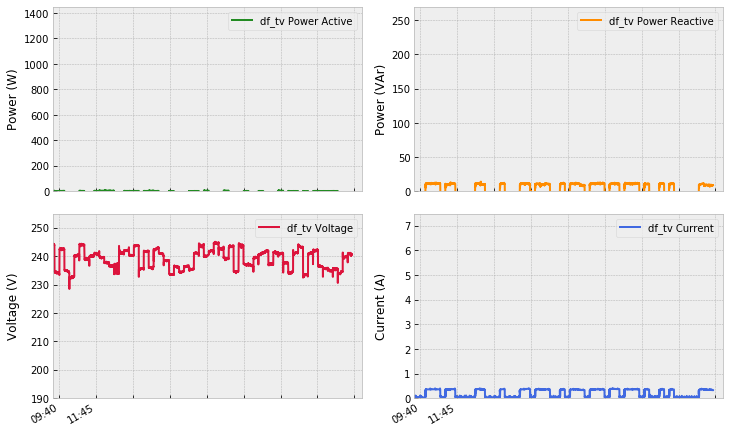

In [12]:
t0 = '2022-11-23 09:40:00+01:00' #tiempo inicial
t1 = '2022-11-23 11:44:00+01:00' #tiempo final

df_tv = next(elec[4].load())[t0:t1] #DataFrame medidor boiler
rcParams['figure.figsize'] = (12, 8)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, gridspec_kw={'hspace': 0.12, 'wspace': 0.17})

df_tv['power', 'active'].plot(ax=ax1,color='forestgreen')
ax1.legend(['df_tv Power Active'])
ax1.set(ylabel='Power (W)')
ax1.set_ylim([0,1450])

df_tv['power', 'reactive'].plot(ax=ax2,color='darkorange')
ax2.legend(['df_tv Power Reactive'])
ax2.set(ylabel='Power (VAr)')
ax2.set_ylim([0,270])

df_tv['voltage'].plot(ax=ax3,color='crimson')
ax3.legend(['df_tv Voltage'])
ax3.set(ylabel='Voltage (V)')
ax3.set_ylim([190,255])

df_tv['current'].plot(ax=ax4,color='royalblue')
ax4.legend(['df_tv Current'])
ax4.set(ylabel='Current (A)')
ax4.set_ylim([0,7.5])

ax1.set(xlim=('2022-11-23 09:42:37+01:00','2022-11-23 11:48+01:00'))

ax1.minorticks_off()
ax1.set_xticklabels(['09:40','11:45'])
fig.align_ylabels([(ax1,ax2,ax3,ax4)])

#guarda gráfico
plt.savefig('./data/images/df_boiler.svg', bbox_inches='tight', transparent=True)
pass

### Kettle

Veamos ahora en forma de grafico las potencias activa y reactiva junto a la tension y la corriente para el medidor numero 7 (Light)

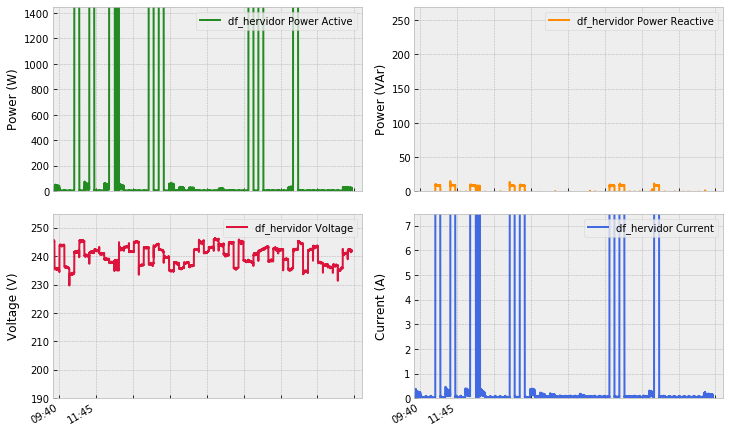

In [19]:
t0 = '2022-11-23 09:40:00+01:00' #tiempo inicial
t1 = '2022-11-23 11:44:00+01:00' #tiempo final

df_ke = next(elec[5].load())[t0:t1] #DataFrame medidor boiler
rcParams['figure.figsize'] = (12, 8)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, gridspec_kw={'hspace': 0.12, 'wspace': 0.17})

df_ke['power', 'active'].plot(ax=ax1,color='forestgreen')
ax1.legend(['df_hervidor Power Active'])
ax1.set(ylabel='Power (W)')
ax1.set_ylim([0,1450])

df_ke['power', 'reactive'].plot(ax=ax2,color='darkorange')
ax2.legend(['df_hervidor Power Reactive'])
ax2.set(ylabel='Power (VAr)')
ax2.set_ylim([0,270])

df_ke['voltage'].plot(ax=ax3,color='crimson')
ax3.legend(['df_hervidor Voltage'])
ax3.set(ylabel='Voltage (V)')
ax3.set_ylim([190,255])

df_ke['current'].plot(ax=ax4,color='royalblue')
ax4.legend(['df_hervidor Current'])
ax4.set(ylabel='Current (A)')
ax4.set_ylim([0,7.5])

ax1.set(xlim=('2022-11-23 09:42:37+01:00','2022-11-23 11:48+01:00'))

ax1.minorticks_off()
ax1.set_xticklabels(['09:40','11:45'])
fig.align_ylabels([(ax1,ax2,ax3,ax4)])

#guarda gráfico
plt.savefig('./data/images/df_hervidor.svg', bbox_inches='tight', transparent=True)
pass

###  Aspiradora

Veamos ahora en forma de grafico las potencias activa y reactiva junto a la tension y la corriente para el medidor numero 3 (Fan)

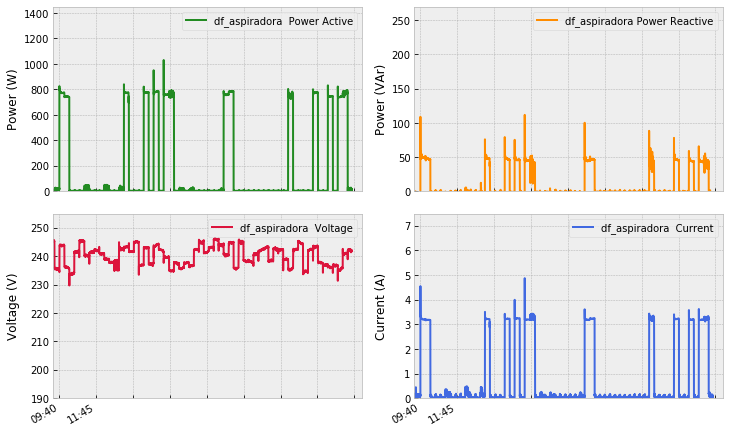

In [20]:
t0 = '2022-11-23 09:40:00+01:00' #tiempo inicial
t1 = '2022-11-23 11:44:00+01:00' #tiempo final


df_vc = next(elec[6].load())[t0:t1] #DataFrame medidor boiler

rcParams['figure.figsize'] = (12, 8)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, gridspec_kw={'hspace': 0.12, 'wspace': 0.17})

df_vc ['power', 'active'].plot(ax=ax1,color='forestgreen')
ax1.legend(['df_aspiradora  Power Active'])
ax1.set(ylabel='Power (W)')
ax1.set_ylim([0,1450])

df_vc ['power', 'reactive'].plot(ax=ax2,color='darkorange')
ax2.legend(['df_aspiradora Power Reactive'])
ax2.set(ylabel='Power (VAr)')
ax2.set_ylim([0,270])

df_vc ['voltage'].plot(ax=ax3,color='crimson')
ax3.legend(['df_aspiradora  Voltage'])
ax3.set(ylabel='Voltage (V)')
ax3.set_ylim([190,255])

df_vc ['current'].plot(ax=ax4,color='royalblue')
ax4.legend(['df_aspiradora  Current'])
ax4.set(ylabel='Current (A)')
ax4.set_ylim([0,7.5])


ax1.set(xlim=('2022-11-23 09:42:37+01:00','2022-11-23 11:48+01:00'))

ax1.minorticks_off()
ax1.set_xticklabels(['09:40','11:45'])
fig.align_ylabels([(ax1,ax2,ax3,ax4)])

#guarda gráfico
plt.savefig('./data/images/df_aspiradora.svg', bbox_inches='tight', transparent=True)
pass

### Estufa de aceite

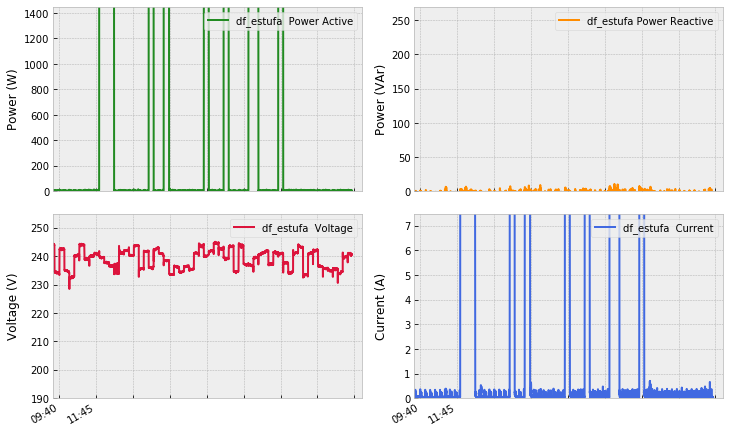

In [21]:
t0 = '2022-11-23 09:40:00+01:00' #tiempo inicial
t1 = '2022-11-23 11:44:00+01:00' #tiempo final


df_sh = next(elec[7].load())[t0:t1] #DataFrame medidor boiler

rcParams['figure.figsize'] = (12, 8)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, gridspec_kw={'hspace': 0.12, 'wspace': 0.17})

df_sh ['power', 'active'].plot(ax=ax1,color='forestgreen')
ax1.legend(['df_estufa  Power Active'])
ax1.set(ylabel='Power (W)')
ax1.set_ylim([0,1450])

df_sh ['power', 'reactive'].plot(ax=ax2,color='darkorange')
ax2.legend(['df_estufa Power Reactive'])
ax2.set(ylabel='Power (VAr)')
ax2.set_ylim([0,270])

df_sh ['voltage'].plot(ax=ax3,color='crimson')
ax3.legend(['df_estufa  Voltage'])
ax3.set(ylabel='Voltage (V)')
ax3.set_ylim([190,255])

df_sh ['current'].plot(ax=ax4,color='royalblue')
ax4.legend(['df_estufa  Current'])
ax4.set(ylabel='Current (A)')
ax4.set_ylim([0,7.5])


ax1.set(xlim=('2022-11-23 09:42:37+01:00','2022-11-23 11:48+01:00'))

ax1.minorticks_off()
ax1.set_xticklabels(['09:40','11:45'])
fig.align_ylabels([(ax1,ax2,ax3,ax4)])

#guarda gráfico
plt.savefig('./data/images/df_estufa.svg', bbox_inches='tight', transparent=True)
pass

### Calentador

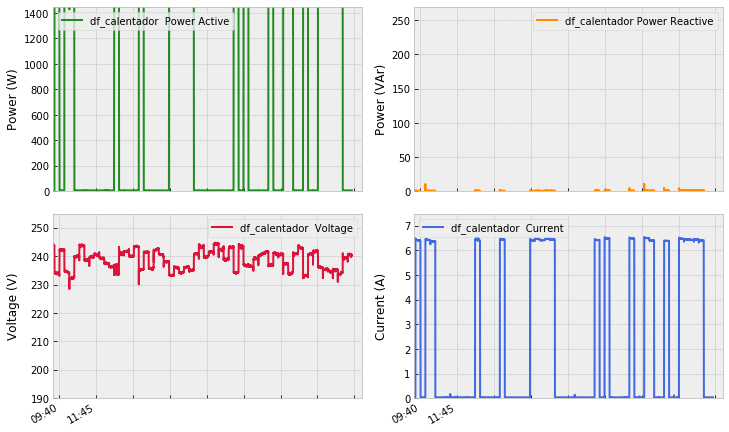

In [22]:
t0 = '2022-11-23 09:40:00+01:00' #tiempo inicial
t1 = '2022-11-23 11:44:00+01:00' #tiempo final


df_sho = next(elec[8].load())[t0:t1] #DataFrame medidor boiler

rcParams['figure.figsize'] = (12, 8)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, gridspec_kw={'hspace': 0.12, 'wspace': 0.17})

df_sho ['power', 'active'].plot(ax=ax1,color='forestgreen')
ax1.legend(['df_calentador  Power Active'])
ax1.set(ylabel='Power (W)')
ax1.set_ylim([0,1450])

df_sho ['power', 'reactive'].plot(ax=ax2,color='darkorange')
ax2.legend(['df_calentador Power Reactive'])
ax2.set(ylabel='Power (VAr)')
ax2.set_ylim([0,270])

df_sho ['voltage'].plot(ax=ax3,color='crimson')
ax3.legend(['df_calentador  Voltage'])
ax3.set(ylabel='Voltage (V)')
ax3.set_ylim([190,255])

df_sho ['current'].plot(ax=ax4,color='royalblue')
ax4.legend(['df_calentador  Current'])
ax4.set(ylabel='Current (A)')
ax4.set_ylim([0,7.5])


ax1.set(xlim=('2022-11-23 09:42:37+01:00','2022-11-23 11:48+01:00'))

ax1.minorticks_off()
ax1.set_xticklabels(['09:40','11:45'])
fig.align_ylabels([(ax1,ax2,ax3,ax4)])

#guarda gráfico
plt.savefig('./data/images/df_calentador.svg', bbox_inches='tight', transparent=True)
pass

### Ventilador

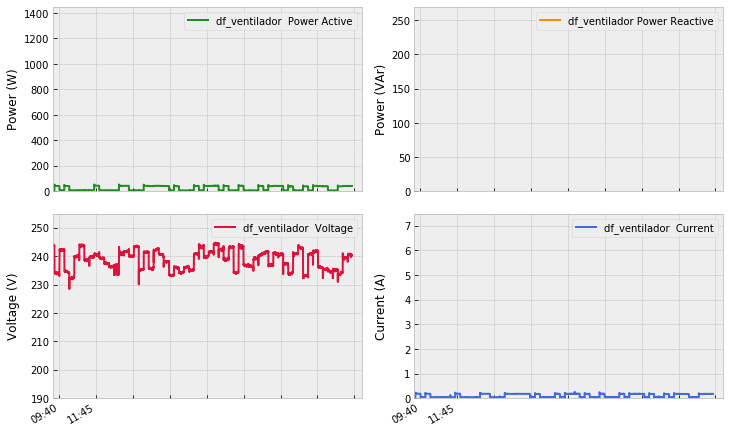

In [23]:
t0 = '2022-11-23 09:40:00+01:00' #tiempo inicial
t1 = '2022-11-23 11:44:00+01:00' #tiempo final


df_fan = next(elec[9].load())[t0:t1] #DataFrame medidor boiler

rcParams['figure.figsize'] = (12, 8)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, gridspec_kw={'hspace': 0.12, 'wspace': 0.17})

df_fan ['power', 'active'].plot(ax=ax1,color='forestgreen')
ax1.legend(['df_ventilador  Power Active'])
ax1.set(ylabel='Power (W)')
ax1.set_ylim([0,1450])

df_fan ['power', 'reactive'].plot(ax=ax2,color='darkorange')
ax2.legend(['df_ventilador Power Reactive'])
ax2.set(ylabel='Power (VAr)')
ax2.set_ylim([0,270])

df_fan ['voltage'].plot(ax=ax3,color='crimson')
ax3.legend(['df_ventilador  Voltage'])
ax3.set(ylabel='Voltage (V)')
ax3.set_ylim([190,255])

df_fan ['current'].plot(ax=ax4,color='royalblue')
ax4.legend(['df_ventilador  Current'])
ax4.set(ylabel='Current (A)')
ax4.set_ylim([0,7.5])


ax1.set(xlim=('2022-11-23 09:42:37+01:00','2022-11-23 11:48+01:00'))

ax1.minorticks_off()
ax1.set_xticklabels(['09:40','11:45'])
fig.align_ylabels([(ax1,ax2,ax3,ax4)])

#guarda gráfico
plt.savefig('./data/images/df_ventilador.svg', bbox_inches='tight', transparent=True)
pass

### Nevera

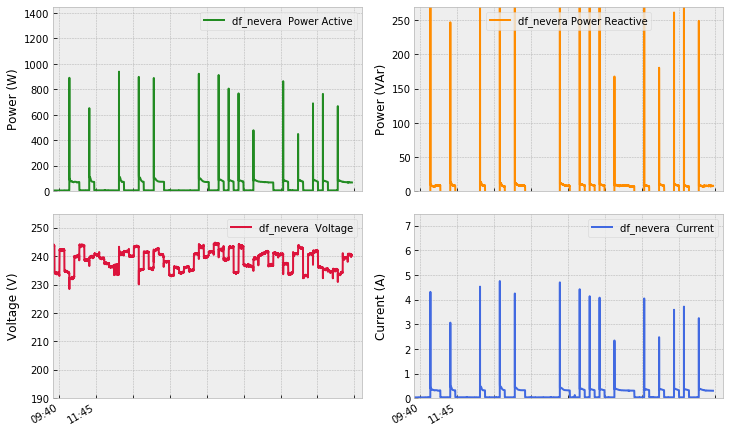

In [24]:
t0 = '2022-11-23 09:40:00+01:00' #tiempo inicial
t1 = '2022-11-23 11:44:00+01:00' #tiempo final


df_fri = next(elec[10].load())[t0:t1] #DataFrame medidor boiler

rcParams['figure.figsize'] = (12, 8)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, gridspec_kw={'hspace': 0.12, 'wspace': 0.17})

df_fri ['power', 'active'].plot(ax=ax1,color='forestgreen')
ax1.legend(['df_nevera  Power Active'])
ax1.set(ylabel='Power (W)')
ax1.set_ylim([0,1450])

df_fri ['power', 'reactive'].plot(ax=ax2,color='darkorange')
ax2.legend(['df_nevera Power Reactive'])
ax2.set(ylabel='Power (VAr)')
ax2.set_ylim([0,270])

df_fri ['voltage'].plot(ax=ax3,color='crimson')
ax3.legend(['df_nevera  Voltage'])
ax3.set(ylabel='Voltage (V)')
ax3.set_ylim([190,255])

df_fri ['current'].plot(ax=ax4,color='royalblue')
ax4.legend(['df_nevera  Current'])
ax4.set(ylabel='Current (A)')
ax4.set_ylim([0,7.5])

ax1.set(xlim=('2022-11-23 09:42:37+01:00','2022-11-23 11:48+01:00'))

ax1.minorticks_off()
ax1.set_xticklabels(['09:40','11:45'])
fig.align_ylabels([(ax1,ax2,ax3,ax4)])

#guarda gráfico
plt.savefig('./data/images/df_nevera.svg', bbox_inches='tight', transparent=True)
pass

### Congelador

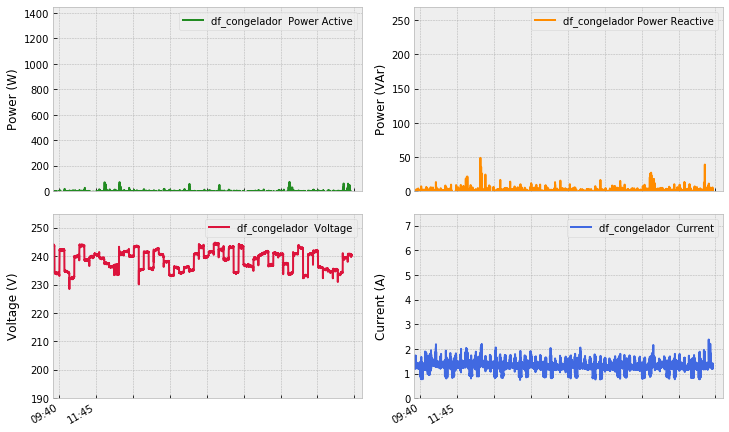

In [26]:
t0 = '2022-11-23 09:40:00+01:00' #tiempo inicial
t1 = '2022-11-23 11:44:00+01:00' #tiempo final


df_fre = next(elec[11].load())[t0:t1] #DataFrame medidor boiler

rcParams['figure.figsize'] = (12, 8)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, gridspec_kw={'hspace': 0.12, 'wspace': 0.17})

df_fre ['power', 'active'].plot(ax=ax1,color='forestgreen')
ax1.legend(['df_congelador  Power Active'])
ax1.set(ylabel='Power (W)')
ax1.set_ylim([0,1450])

df_fre ['power', 'reactive'].plot(ax=ax2,color='darkorange')
ax2.legend(['df_congelador Power Reactive'])
ax2.set(ylabel='Power (VAr)')
ax2.set_ylim([0,270])

df_fre ['voltage'].plot(ax=ax3,color='crimson')
ax3.legend(['df_congelador  Voltage'])
ax3.set(ylabel='Voltage (V)')
ax3.set_ylim([190,255])

df_fre ['current'].plot(ax=ax4,color='royalblue')
ax4.legend(['df_congelador  Current'])
ax4.set(ylabel='Current (A)')
ax4.set_ylim([0,7.5])


ax1.set(xlim=('2022-11-23 09:42:37+01:00','2022-11-23 11:48+01:00'))

ax1.minorticks_off()
ax1.set_xticklabels(['09:40','11:45'])
fig.align_ylabels([(ax1,ax2,ax3,ax4)])

#guarda gráfico
plt.savefig('./data/images/df_congelador.svg', bbox_inches='tight', transparent=True)
pass

### M.Principal

Por ultimo veamos ahora en forma de grafico las potencias activa y reactiva junto a la tension y la corriente para el medidor numero 5 (TV)

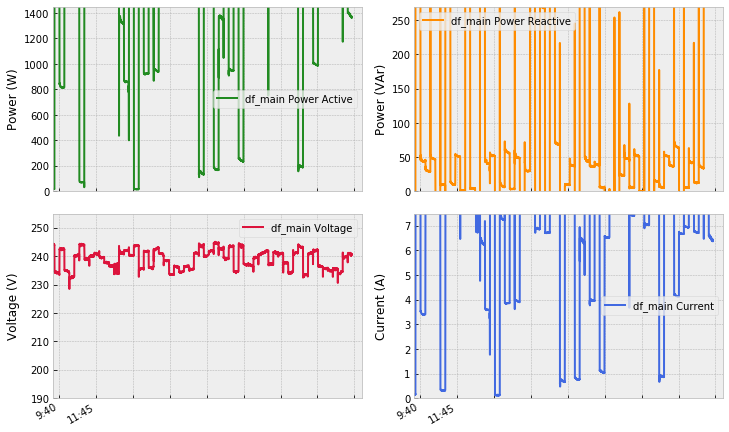

In [105]:
t0 = '2022-11-23 09:40:00+01:00' #tiempo inicial
t1 = '2022-11-23 11:44:00+01:00' #tiempo final


df_main = next(elec[1].load())[t0:t1] #DataFrame medidor boiler
rcParams['figure.figsize'] = (12, 8)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, gridspec_kw={'hspace': 0.12, 'wspace': 0.17})

df_main['power', 'active'].plot(ax=ax1,color='forestgreen')
ax1.legend(['df_main Power Active'])
ax1.set(ylabel='Power (W)')
ax1.set_ylim([0,1450])

df_main['power', 'reactive'].plot(ax=ax2,color='darkorange')
ax2.legend(['df_main Power Reactive'])
ax2.set(ylabel='Power (VAr)')
ax2.set_ylim([0,270])

df_main['voltage'].plot(ax=ax3,color='crimson')
ax3.legend(['df_main Voltage'])
ax3.set(ylabel='Voltage (V)')
ax3.set_ylim([190,255])

df_main['current'].plot(ax=ax4,color='royalblue')
ax4.legend(['df_main Current'])
ax4.set(ylabel='Current (A)')
ax4.set_ylim([0,7.5])

ax1.set(xlim=('2022-11-23 09:42:37+01:00','2022-11-23 11:48+01:00'))

ax1.minorticks_off()
ax1.set_xticklabels(['9:40','11:45'])
fig.align_ylabels([(ax1,ax2,ax3,ax4)])

#guarda gráfico
plt.savefig('./data/images/df_tv.svg', bbox_inches='tight', transparent=True)
pass

### Trazar los electrodomésticos cuando estén en uso

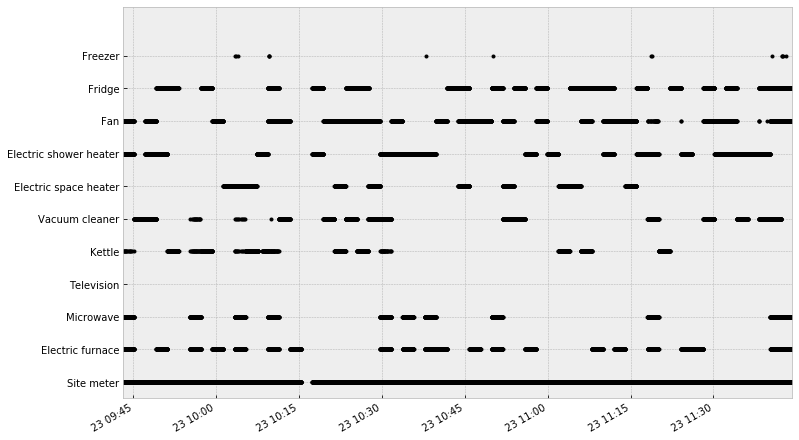

In [106]:
#sns.set_palette("Set3", n_colors=12)
# Set a threshold to remove residual power noise when devices are off
elec.plot_when_on(on_power_threshold = 40)

## Trazar datos submedidos para un solo día

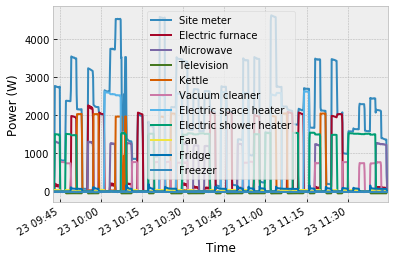

In [11]:
dsualm.set_window(start='2022-11', end='2022-12')
elec.plot();
plt.xlabel("Time");

## Gráfico de autocorrelación

In [108]:
from pandas.plotting import autocorrelation_plot

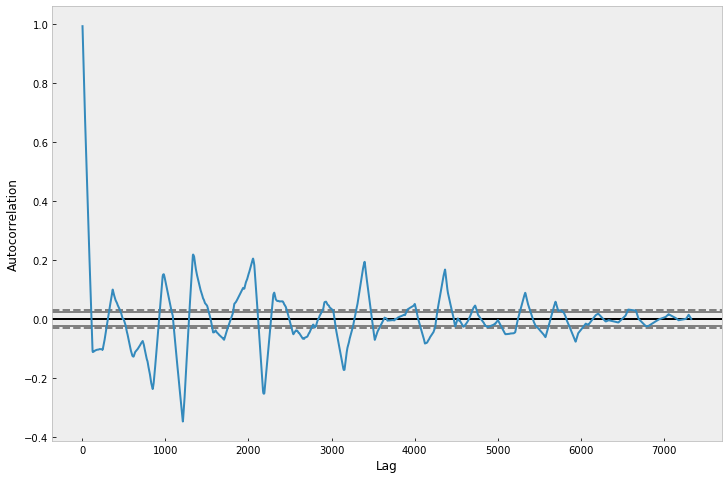

In [109]:
elec.mains().plot_autocorrelation();

## Cambio en el muestreo de datos

Al cambiar el muestro de datos, NILMTK utiliza por defecto el método mean o media aritmética el cual calculará un promedio de los valores que se encuentren de la serie de tiempo, divididos en grupos correspondientes al nuevo periodo de muestreo. Además de este método se pueden especificar otros tales como el primer dato válido (first), la mediana (median), el valor más cercano (nearest), o utilizar el valor inmediatamente posterior (ffill o pad), entre otros.

### Energia activa

Vamos ahora analizar la potencia  activa correspondiente el contador global  usando diferentes periodos de muestreo

In [110]:
m = 1 #meter
method1 = {'how': 'mean'}
method2 = {'how': 'median'}
method3 = {'how': 'first'}

#medición original, cada 1 segundo
df_1s   = next(elec[m].load(ac_type='active',sample_period=1,       resample_kwargs=method1))
#resamples
df1_10s  = next(elec[m].load(ac_type='active', sample_period=10,     resample_kwargs=method1))
df1_30s  = next(elec[m].load(ac_type='active', sample_period=30,     resample_kwargs=method1))
df1_60s  = next(elec[m].load(ac_type='active', sample_period=60*1,   resample_kwargs=method1))
df1_5m   = next(elec[m].load(ac_type='active', sample_period=60*5,   resample_kwargs=method1))
df1_10m  = next(elec[m].load(ac_type='active', sample_period=60*10,  resample_kwargs=method1))
df1_15m  = next(elec[m].load(ac_type='active', sample_period=60*15,  resample_kwargs=method1))
df1_30m  = next(elec[m].load(ac_type='active', sample_period=60*30,  resample_kwargs=method1))

df2_10s  = next(elec[m].load(ac_type='active', sample_period=10,    resample_kwargs=method2))
df2_30s  = next(elec[m].load(ac_type='active', sample_period=30,    resample_kwargs=method2))
df2_60s  = next(elec[m].load(ac_type='active', sample_period=60*1,  resample_kwargs=method2))
df2_5m   = next(elec[m].load(ac_type='active', sample_period=60*5,  resample_kwargs=method2))
df2_10m  = next(elec[m].load(ac_type='active', sample_period=60*10,  resample_kwargs=method2))
df2_15m  = next(elec[m].load(ac_type='active', sample_period=60*15,  resample_kwargs=method2))
df2_30m  = next(elec[m].load(ac_type='active', sample_period=60*30,  resample_kwargs=method2))

df3_10s  = next(elec[m].load(ac_type='active', sample_period=10,    resample_kwargs=method3))
df3_30s  = next(elec[m].load(ac_type='active', sample_period=30,    resample_kwargs=method3))
df3_60s  = next(elec[m].load(ac_type='active', sample_period=60*1,  resample_kwargs=method3))
df3_5m   = next(elec[m].load(ac_type='active', sample_period=60*5,  resample_kwargs=method3))
df3_10m  = next(elec[m].load(ac_type='active', sample_period=60*10,  resample_kwargs=method3))
df3_15m  = next(elec[m].load(ac_type='active', sample_period=60*15,  resample_kwargs=method3))
df3_30m  = next(elec[m].load(ac_type='active', sample_period=60*30,  resample_kwargs=method3))

#dataframe completo
dfs1=[df_1s,df1_10s,df1_30s,df1_60s,df1_5m,df1_10m,df1_15m,df1_30m]
#dataframe completo
dfs2=[df_1s,df2_10s,df2_30s,df2_60s,df2_5m,df2_10m,df2_15m,df2_30m]
#dataframe completo
dfs3=[df_1s,df3_10s,df3_30s,df3_60s,df3_5m,df3_10m,df3_15m,df3_30m]

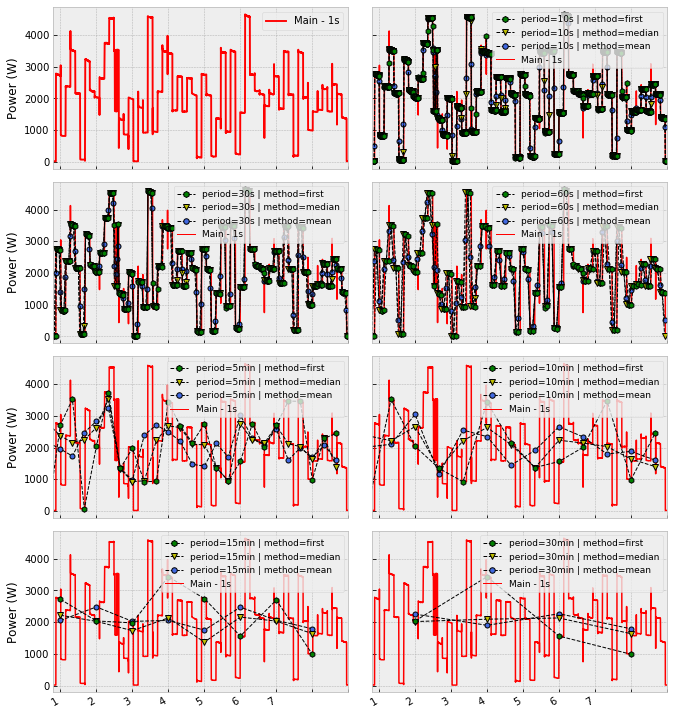

In [111]:
rcParams['figure.figsize'] = (11, 14)

t0 = '2022-11-23 09:40:00+01:00' #tiempo inicial
t1 = '2022-11-23 11:45:00+01:00' #tiempo final

labels_ = ['Main - 1s','10s','30s','60s','5min','10min','15min','30min']
fig, ((ax1, ax2), (ax3, ax4),(ax5, ax6),(ax7, ax8)) = plt.subplots(4, 2, sharex=True, sharey=True,
                                                                   gridspec_kw={'hspace': 0.08, 'wspace': 0.08})
i = 1
for ax in fig.get_axes():   
    if ax == ax1:
        df_1s[t0:t1].plot(ax=ax,linewidth=1.9,color='r')
        ax.legend([labels_[0]])               
    else:
        import matplotlib.lines as mlines
        df_1s[t0:t1].plot(ax=ax,linewidth=1.5,color='r') 
        dfs1[i][t0:t1].plot(ax=ax,lw=1, c='k', ls='--', marker="o", markersize=5, markerfacecolor='royalblue')    
        dfs2[i][t0:t1].plot(ax=ax,lw=1, c='k', ls='--', marker="v", markersize=5.5, markerfacecolor='y')
        dfs3[i][t0:t1].plot(ax=ax,lw=1, c='k', ls='--', marker="h", markersize=5.5, markerfacecolor='g')
        #etiquetas
        line0 = mlines.Line2D([], [], lw=1, c='red', label= labels_[0])
        line1 = mlines.Line2D([], [], lw=1, c='k', ls='--', marker="o", markersize=5.5,
                              markerfacecolor='royalblue', label='period='+labels_[i]+' | method=mean')
        line2 = mlines.Line2D([], [], lw=1, c='k', ls='--', marker="v", markersize=6,
                              markerfacecolor='y', label='period='+labels_[i] + ' | method=median')
        ax.legend(handles=[line2, line1, line0], fontsize=9)
        line3 = mlines.Line2D([], [], lw=1, c='k', ls='--', marker="h", markersize=6,
                              markerfacecolor='g', label='period='+labels_[i] + ' | method=first')
        ax.legend(handles=[line3, line2, line1, line0], fontsize=9)
        plt.setp(ax.xaxis.get_majorticklabels(), ha='right')
        i = i+1
    ax.set(ylabel='Power (W)')

ax1.set(xlim=('2022-11-23 09:42:00+01:00','2022-11-23 11:45:00+01:00'))
ax1.minorticks_off()
ax1.set_xticklabels(['1','2','3','4','5','6','7'])

#guarda gráfico
plt.savefig('./data/images/2.3_Resample.svg', bbox_inches='tight', transparent=True)
pass

### Energia reactiva

Vamos ahora analizar la potencia  reactiva correspondiente el contador global  usando diferentes periodos de muestreo

In [112]:
m = 1 #meter
method1 = {'how': 'mean'}
method2 = {'how': 'median'}
method3 = {'how': 'first'}

#medición original, cada 1 segundo
df_1s   = next(elec[m].load(ac_type='reactive',sample_period=1,       resample_kwargs=method1))
#resamples
df1_10s  = next(elec[m].load(ac_type='reactive', sample_period=10,     resample_kwargs=method1))
df1_30s  = next(elec[m].load(ac_type='reactive', sample_period=30,     resample_kwargs=method1))
df1_60s  = next(elec[m].load(ac_type='reactive', sample_period=60*1,   resample_kwargs=method1))
df1_5m   = next(elec[m].load(ac_type='reactive', sample_period=60*5,   resample_kwargs=method1))
df1_10m  = next(elec[m].load(ac_type='reactive', sample_period=60*10,  resample_kwargs=method1))
df1_15m  = next(elec[m].load(ac_type='reactive', sample_period=60*15,  resample_kwargs=method1))
df1_30m  = next(elec[m].load(ac_type='reactive', sample_period=60*30,  resample_kwargs=method1))

df2_10s  = next(elec[m].load(ac_type='reactive', sample_period=10,    resample_kwargs=method2))
df2_30s  = next(elec[m].load(ac_type='reactive', sample_period=30,    resample_kwargs=method2))
df2_60s  = next(elec[m].load(ac_type='reactive', sample_period=60*1,  resample_kwargs=method2))
df2_5m   = next(elec[m].load(ac_type='reactive', sample_period=60*5,  resample_kwargs=method2))
df2_10m  = next(elec[m].load(ac_type='reactive', sample_period=60*10,  resample_kwargs=method2))
df2_15m  = next(elec[m].load(ac_type='reactive', sample_period=60*15,  resample_kwargs=method2))
df2_30m  = next(elec[m].load(ac_type='reactive', sample_period=60*30,  resample_kwargs=method2))

df3_10s  = next(elec[m].load(ac_type='reactive', sample_period=10,    resample_kwargs=method3))
df3_30s  = next(elec[m].load(ac_type='reactive', sample_period=30,    resample_kwargs=method3))
df3_60s  = next(elec[m].load(ac_type='reactive', sample_period=60*1,  resample_kwargs=method3))
df3_5m   = next(elec[m].load(ac_type='reactive', sample_period=60*5,  resample_kwargs=method3))
df3_10m  = next(elec[m].load(ac_type='reactive', sample_period=60*10,  resample_kwargs=method3))
df3_15m  = next(elec[m].load(ac_type='reactive', sample_period=60*15,  resample_kwargs=method3))
df3_30m  = next(elec[m].load(ac_type='reactive', sample_period=60*30,  resample_kwargs=method3))

#dataframe completo
dfs1=[df_1s,df1_10s,df1_30s,df1_60s,df1_5m,df1_10m,df1_15m,df1_30m]
#dataframe completo
dfs2=[df_1s,df2_10s,df2_30s,df2_60s,df2_5m,df2_10m,df2_15m,df2_30m]
#dataframe completo
dfs3=[df_1s,df3_10s,df3_30s,df3_60s,df3_5m,df3_10m,df3_15m,df3_30m]

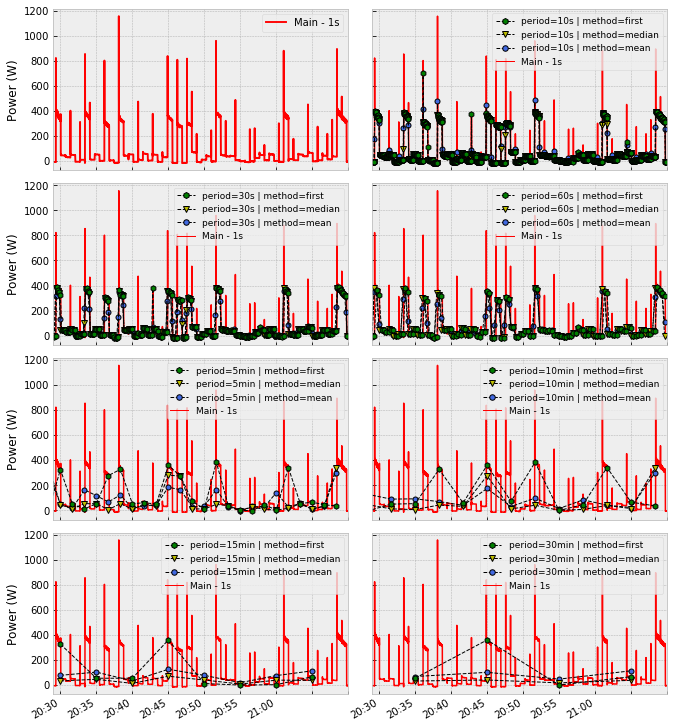

In [113]:
rcParams['figure.figsize'] = (11, 14)

t0 = '2022-11-23 09:40:00+01:00' #tiempo inicial
t1 = '2022-11-23 11:45:00+01:00' #tiempo final

labels_ = ['Main - 1s','10s','30s','60s','5min','10min','15min','30min']
fig, ((ax1, ax2), (ax3, ax4),(ax5, ax6),(ax7, ax8)) = plt.subplots(4, 2, sharex=True, sharey=True,
                                                                   gridspec_kw={'hspace': 0.08, 'wspace': 0.08})
i = 1
for ax in fig.get_axes():   
    if ax == ax1:
        df_1s[t0:t1].plot(ax=ax,linewidth=1.9,color='r')
        ax.legend([labels_[0]])               
    else:
        import matplotlib.lines as mlines
        df_1s[t0:t1].plot(ax=ax,linewidth=1.5,color='r') 
        dfs1[i][t0:t1].plot(ax=ax,lw=1, c='k', ls='--', marker="o", markersize=5, markerfacecolor='royalblue')    
        dfs2[i][t0:t1].plot(ax=ax,lw=1, c='k', ls='--', marker="v", markersize=5.5, markerfacecolor='y')
        dfs3[i][t0:t1].plot(ax=ax,lw=1, c='k', ls='--', marker="h", markersize=5.5, markerfacecolor='g')
        #etiquetas
        line0 = mlines.Line2D([], [], lw=1, c='red', label= labels_[0])
        line1 = mlines.Line2D([], [], lw=1, c='k', ls='--', marker="o", markersize=5.5,
                              markerfacecolor='royalblue', label='period='+labels_[i]+' | method=mean')
        line2 = mlines.Line2D([], [], lw=1, c='k', ls='--', marker="v", markersize=6,
                              markerfacecolor='y', label='period='+labels_[i] + ' | method=median')
        ax.legend(handles=[line2, line1, line0], fontsize=9)
        line3 = mlines.Line2D([], [], lw=1, c='k', ls='--', marker="h", markersize=6,
                              markerfacecolor='g', label='period='+labels_[i] + ' | method=first')
        ax.legend(handles=[line3, line2, line1, line0], fontsize=9)
        plt.setp(ax.xaxis.get_majorticklabels(), ha='right')
        i = i+1
    ax.set(ylabel='Power (W)')

    
ax1.set(xlim=('2022-11-23 09:42:00+01:00','2022-11-23 11:45:00+01:00'))
#ax1.set(xlim=('2021-11-10 18:00:00+01:00','2021-11-12 18:05:00+01:00'))
ax1.minorticks_off()
ax1.set_xticklabels(['20:30','20:35','20:40','20:45','20:50','20:55','21:00'])

#guarda gráfico
plt.savefig('./data/images/2.4_Resample.svg', bbox_inches='tight', transparent=True)
pass